In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = 'https://drive.usercontent.google.com/download?id=1nGa7vwUI_PehcbpS4-78NFa0QcMjV0AD&export=download&authuser=0&confirm=t&uuid=d6b0357f-cabb-47b5-ac2e-4e8e2868cece&at=APZUnTXHipjpMaqihi9chRjbleyb:1716478782781'

raindf = pd.read_csv(url)

In [5]:
raindf.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

Tập dữ liệu chứa các thông tin:
- Ngày quan sát
- vị trí
- dữ liệu khí tượng (nhiệt độ, độ ẩm, gió, lượng mưa, áp suất,...)

In [6]:
raindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Tập dữ liệu chứa các biến phân loại (7 biến) và các biến liên tục (16 biến)

In [7]:
raindf.describe(include=['object'])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

Bộ dữ liệu chứa các quan sát trong 3436 ngày từ 49 khu vực khác nhau.\
Các thuộc tính phân loại có số lượng giá trị khác nhau không nhiều,  đây là điều tốt vì sẽ ít ảnh hưởng đến độ chính xác của các mô hình 

# thống kê mô tả về toàn tập dữ liệu

In [8]:
raindf.describe()


MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

Lượng mưa dao động từ 0,0 mm đến 371,0 mm. Trung bình lượng mưa ghi nhận được là 2,36 mm. Độ lệch chuẩn 8,48 mm cho thấy lượng mưa có thể thay đổi đáng kể theo từng ngày.

Nhiệt độ: Được đo bằng độ C (°C).\
Lượng mưa: Lượng mưa được biểu thị bằng milimét (mm).\
Sự bay hơi: Lượng nước bay hơi trong một khoảng thời gian, thường là 24 giờ, tính bằng milimét (mm).\
Tốc độ gió: Được đo bằng kilômét trên giờ (km/h).\
Độ ẩm: Phần trăm (%) độ ẩm không khí tương đối.\
Áp suất: Áp suất khí quyển được đo bằng hectopascal (hPa).\
Độ mây: Được đo theo thang điểm, thường từ 0 đến 9, biểu thị độ che phủ của mây.

In [9]:
mvdf = pd.DataFrame(raindf.isna().sum()).reset_index()
mvdf.columns = ['Features','Missing Values']

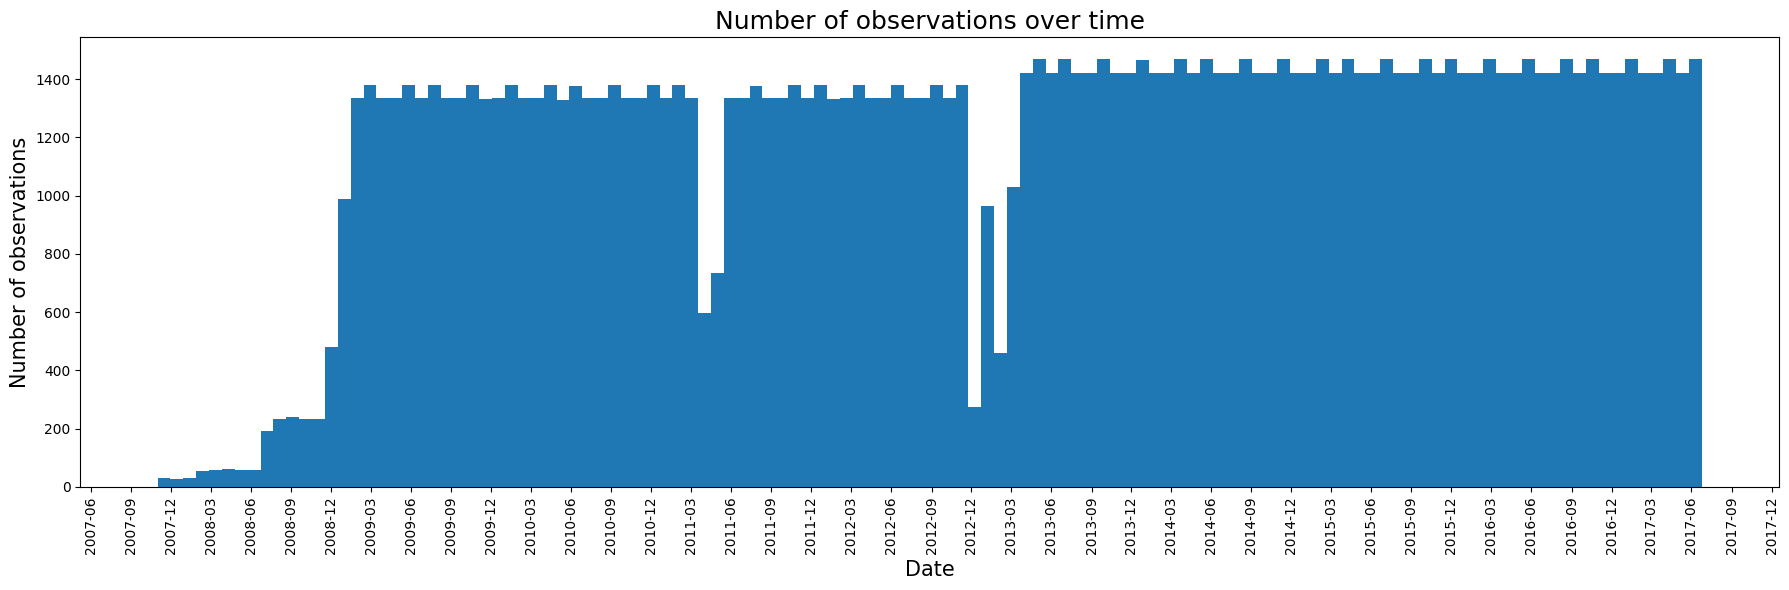

In [10]:
import matplotlib.dates as mdates
raindf['Date'] = pd.to_datetime(raindf['Date'])
plt.figure(figsize=(18, 6))
plt.hist(raindf['Date'], bins=120)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  
plt.xticks(rotation=90)

ax = plt.gca()


plt.title('Number of observations over time',fontsize=18)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Number of observations',fontsize=15)
plt.tight_layout()

plt.show()

Số lượng quan sát tăng mạnh từ tháng 2 năm 2009.\
Có mất mát thông tin vào 3/2011 và 12/2012

#### Đếm số lượng dữ liệu bị thiếu

In [11]:
mvdf

Features  Missing Values
0            Date               0
1        Location               0
2         MinTemp            1485
3         MaxTemp            1261
4        Rainfall            3261
5     Evaporation           62790
6        Sunshine           69835
7     WindGustDir           10326
8   WindGustSpeed           10263
9      WindDir9am           10566
10     WindDir3pm            4228
11   WindSpeed9am            1767
12   WindSpeed3pm            3062
13    Humidity9am            2654
14    Humidity3pm            4507
15    Pressure9am           15065
16    Pressure3pm           15028
17       Cloud9am           55888
18       Cloud3pm           59358
19        Temp9am            1767
20        Temp3pm            3609
21      RainToday            3261
22   RainTomorrow            3267

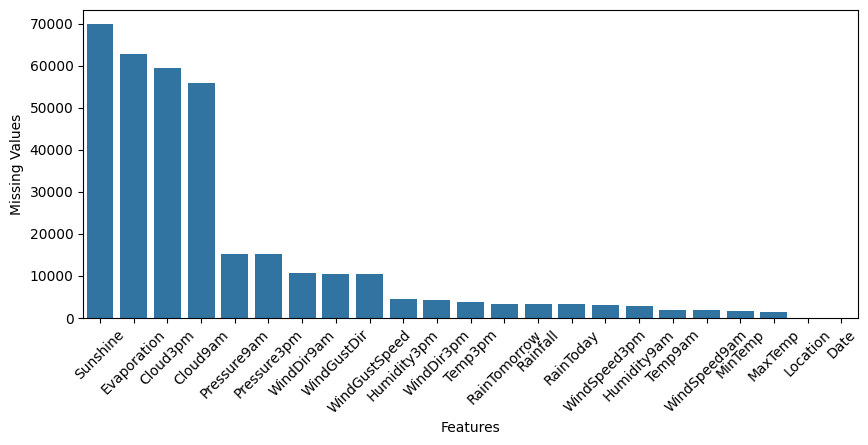

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
#sns.barplot(x= mvdf['Features'], y=mvdf['Missing Values'],ax=ax)
sns.barplot(data = mvdf.sort_values(by='Missing Values', ascending=False), x='Features', y='Missing Values',ax=ax)

ax.tick_params(axis='x', labelrotation=45)

Dữ liêu bị thiếu khá nhiều ở một số thuộc tính như 'sinshine', 'Evoporation', 'cloud3pm', cần tìm một phương pháp để khắc phục sự thiếu sót dữ liệu này

([<matplotlib.patches.Wedge at 0x16d81022010>,
 [Text(-1.1263154464296765, -0.41402115300298237, 'DataNull'),
  Text(1.032455790360696, 0.37951948691822235, 'DataNotnull')],
 [Text(-0.6570173437506446, -0.24151233925173968, '61.2%'),
  Text(0.5631577038331068, 0.20701062922812125, '38.8%')])

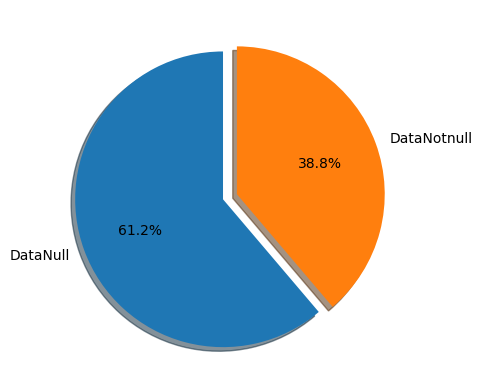

In [13]:

labels = 'DataNull', 'DataNotnull'
sizes = [len(raindf) - len(raindf.dropna()), len(raindf.dropna())]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)

Cách đơn gỉản nhất có thể nghĩ đến là xóa các quan sát bị thiếu, tuy nhiên với tập dữ liệu này, số lượng quan sát có thuộc tính bị thiếu chiém 61.2%. Việc sử dụng phương pháp này sẽ gây ra mất mát 1 lượng lớn dữ liệu làm thay đổi phân của các thuộc tính ban đầu\
=> không thể chấp nhận phương pháp này

In [14]:
import numpy as np

Phương pháp được lựa chọn để giải quyết việc thiếu dữ liệu ở đây là sử dụng các thuộc tính đã biết để dự đoán ra các phần dữ liệu thiếu\
Để thực hiện phương pháp này trước tiên ta sẽ xử lí các thuộc tính phân loại, sau đó đưa dữ liệu vào dự đoán

In [15]:

def map_wind_direction(df, columns, rose16):
    degrees = np.arange(0, 360, 22.5)
    rose16_dict = dict(zip(rose16, degrees))
    for column in columns:
        df[column + '_deg'] = df[column].map(rose16_dict)
    return df.drop(columns, axis=1)


rose16 = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE", "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]


columns_to_process = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

raindf = map_wind_direction(raindf, columns_to_process, rose16)

Chuyển đổi các thuộc tính hướng gió về đơn vị độ

In [16]:


def calculate_trigonometric_columns(df, columns):
    for column in columns:
        df[column + '_x'] = np.round(np.sin(2 * np.pi * (df[column + '_deg'] / 360)), 3)
        df[column + '_y'] = np.round(np.cos(2 * np.pi * (df[column + '_deg'] / 360)), 3)
    return df.drop([column + '_deg' for column in columns], axis=1)

# Áp dụng hàm cho DataFrame raindf
columns_to_process = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
raindf = calculate_trigonometric_columns(raindf, columns_to_process)

Tuy nhiên việc sử dụng đơn vị độ sẽ làm mất đi sự tương quan của thuộc tính này, vì vậy ta sẽ chiếu lên hệ trục oxy 

In [17]:
lat_lon_dict = {
    'Adelaide':(-34.9281805,138.5999312),'Albany':(41.000028,19.9999619),'Albury':(-36.0737304,146.9135396),
    'AliceSprings':(-23.6983884,133.8812885),'BadgerysCreek':(-33.8816671,150.7441627),'Ballarat':(-37.5623025,143.8605649),
    'Bendigo':(-36.7588767,144.2825931),'Brisbane':(-27.4689682,153.0234991),'Cairns':(-16.9206657,145.7721854),
    'Canberra':(-35.2975906,149.1012676),'Cobar':(-31.4983333,145.8344444),'CoffsHarbour':(-30.2986319,153.1227414),
    'Dartmoor':(50.5657372,-3.90097323715792),'Darwin':(-12.46044,130.8410469),'GoldCoast':(-28.0023731,153.4145987),
    'Hobart':(-42.8825088,147.3281233),'Katherine':(-14.4646157,132.2635993),'Launceston':(-41.4340813,147.1373496),
    'Melbourne':(-37.8142454,144.9631732),'MelbourneAirport':(-37.66695115,144.83348479329175),
    'Mildura':(-34.195274,142.1503146),'Moree':(47.9015941,1.2378026),'MountGambier':(-37.8246698,140.7820067624113),
    'MountGinini':(-35.5297437,148.7725396),'Newcastle':(54.9738474,-1.6131572),'Nhil':(53.5536418,10.0098056),
    'NorahHead':(-33.2816667,151.5677778),'NorfolkIsland':(-29.0328038,167.9483137),'Nuriootpa':(-34.4693354,138.9939006),
    'PearceRAAF':(-31.6739604,116.01754351808195),'Penrith':(54.6649465,-2.749059585987326),
    'Perth':(-31.9558933,115.8605855),'PerthAirport':(-31.9406095,115.96760765137932),'Portland':(45.5202471,-122.674194),
    'Richmond':(37.5385087,-77.43428),'Sale':(44.980656,8.809348),'SalmonGums':(-32.9815347,121.6439417),
    'Sydney':(-33.8698439,151.2082848),'SydneyAirport':(-33.935309,151.1655825),'Townsville':(-19.2569391,146.8239537),
    'Tuggeranong':(-35.4209771,149.0921341),'Uluru':(-25.3455545,131.03696147470208),
    'WaggaWagga':(-35.115,147.3677778),'Walpole':(42.1417653,-71.2494985),'Watsonia':(-37.7110022,145.083635),
    'Williamtown':(-32.815,151.8427778),'Witchcliffe':(-34.0263348,115.1004768),'Wollongong':(-34.4278083,150.893054),
    'Woomera':(-31.1999142,136.8253532)}

raindf['Lat'] = raindf['Location'].map(lambda loc: lat_lon_dict[loc][0])
raindf['Lat'] = raindf['Lat'].astype('float64') 
raindf['Lon'] = raindf['Location'].map(lambda loc: lat_lon_dict[loc][1])
raindf['Lon'] = raindf['Lon'].astype('float64') 



Với thuộc tính location ta xử lí bằng cách chuyển mỗi khu vực thành tọa độ của nó trên bản đồ


In [18]:
raindf['Date'] = pd.to_datetime(raindf['Date'])

In [19]:
raindf['month'] = raindf.Date.dt.month
raindf['month_sin'] = np.sin(2 * np.pi * raindf['month']/12)
raindf['month_cos'] = np.cos(2 * np.pi * raindf['month']/12)

raindf = raindf.drop('month',axis=1)

Việc dự đoán mưa hay không mưa thường chịu ảnh hưởng từ tháng hơn là ảnh hưởng theo từng ngày, vì vậy ta chỉ xét đến tháng

In [20]:
raindf['RainToday'] = raindf['RainToday'].replace({'Yes': 1, 'No': 0})
raindf['RainTomorrow'] = raindf['RainTomorrow'].replace({'Yes': 1, 'No': 0})
raindf

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1      2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2      2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3      2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4      2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...           ...      ...      ...      ...       ...          ...       ...   
145455 2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
145456 2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
145457 2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
145458 2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
145459 2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

        WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  WindGustDir_x  \
0                44.0          20.0          24.0  ...         -1.000   
1                44.0           4.0          22.0  ...         -0.924   
2                46.0          19.0          26.0  ...         -0.924   
3                24.0          11.0           9.0  ...          0.707   
4                41.0           7.0          20.0  ...         -1.000   
...               ...           ...           ...  ...            ...   
145455           31.0          13.0          11.0  ...          1.000   
145456           22.0          13.0           9.0  ...         -0.383   
145457           37.0           9.0           9.0  ...          0.000   
145458           28.0          13.0           7.0  ...          0.707   
145459            NaN          17.0          17.0  ...            NaN   

        WindGustDir_y  WindDir9am_x  WindDir9am_y  WindDir3pm_x  WindDir3pm_y  \
0              -0.000        -1.000        -0.000        -0.924         0.383   
1               0.383        -0.383         0.924        -0.924        -0.383   
2              -0.383        -1.000        -0.000        -0.924        -0.383   
3               0.707         0.707        -0.707         1.000         0.000   
4              -0.000         0.924         0.383        -0.707         0.707   
...               ...           ...           ...           ...           ...   
145455          0.000         0.707        -0.707         0.924         0.383   
145456          0.924         0.707        -0.707         0.000         1.000   
145457          1.000         0.707        -0.707        -0.924         0.383   
145458         -0.707         0.383        -0.924         0.000         1.000   
145459            NaN         0.924        -0.383         0.924        -0.383   

              Lat         Lon     month_sin  month_cos  
0      -36.073730  146.913540 -2.449294e-16        1.0  
1      -36.073730  146.913540 -2.449294e-16        1.0  
2      -36.073730  146.913540 -2.449294e-16        1.0  
3      -36.073730  146.913540 -2.449294e-16        1.0  
4      -36.073730  146.913540 -2.449294e-16        1.0  
...           ...         ...           ...        ...  
145455 -25.345554  131.036961  1.224647e-16       -1.0  
145456 -25.345554  131.036961  1.224647e-16       -1.0  
145457 -25.345554  131.036961  1.224647e-16       -1.0  
145458 -25.345554  131.036961  1.224647e-16       -1.0  
145459 -25.345554  131.036961  1.224647e-16       -1.0  

[145460 rows x 30 columns]

Nhận thấy tỉ lệ dữ liệu bị thiếu ở cột mục tiêu chỉ chiếm 2% ta có thể lựa chọn xóa các quan sát bị thiếu thuộc tính RainTomorrow

In [21]:
raindf_times_series = raindf.drop('RainTomorrow', axis=1)

([<matplotlib.patches.Wedge at 0x151e4f03850>,
 [Text(-0.07755104981892615, 1.0972628831196207, 'missing_target'),
  Text(0.0775509727690523, -1.097262888565258, 'non_missing_target')],
 [Text(-0.042300572628505166, 0.5985070271561567, '2.2%'),
  Text(0.04230053060130125, -0.5985070301265043, '97.8%')])

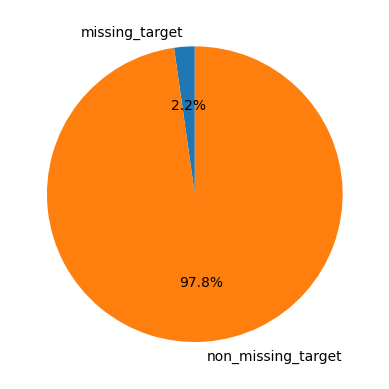

In [65]:
missing_target = raindf['RainTomorrow'].isnull().sum()

labels = 'missing_target', 'non_missing_target'
sizes = [missing_target, len(raindf)-missing_target]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

In [66]:
missing_target_index = raindf[raindf['RainTomorrow'].isnull()].index

raindf.drop(missing_target_index, inplace=True)
raindf.reset_index(inplace=True, drop=True)

In [67]:
raindf['Location'] = raindf.Location.astype('category')



# Xử lí dữ liệu bị thiếu

In [68]:
import miceforest as mf
from sklearn.preprocessing import StandardScaler


raindf_X = raindf.drop(['RainTomorrow','Date', 'Location'],axis=1)
columns = raindf_X.columns
scaler = StandardScaler()
raindf_X = scaler.fit_transform(raindf_X)
raindf_X = pd.DataFrame(raindf_X, columns=columns)
kds = mf.ImputationKernel(
  raindf_X,
  save_all_iterations=True,
  random_state=2023
)


kds.mice(2)

raindf_X = kds.complete_data()

c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [69]:
raindf_X.isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
WindGustDir_x    0
WindGustDir_y    0
WindDir9am_x     0
WindDir9am_y     0
WindDir3pm_x     0
WindDir3pm_y     0
Lat              0
Lon              0
month_sin        0
month_cos        0
dtype: int64

In [70]:
data_clustering = raindf_X 
data_clustering

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.189528 -0.045912 -0.206727     0.126579 -0.323907       0.295517   
1      -0.747494  0.263181 -0.277606     0.365327  0.601652       0.295517   
2       0.111443  0.347479 -0.277606     0.460826  1.368544       0.442698   
3      -0.466387  0.670622 -0.277606    -0.350918  0.892542      -1.176289   
4       0.829827  1.274759 -0.159474     0.604075 -1.381688       0.074746   
...          ...       ...       ...          ...       ...            ...   
142188 -1.356559 -0.200459 -0.277606     0.317577  0.495874      -0.661157   
142189 -1.465878  0.024336 -0.277606    -0.589666  0.680986      -0.661157   
142190 -1.340942  0.291280 -0.277606    -0.398668  0.337207      -1.323469   
142191 -1.059835  0.516076 -0.277606     0.269828  0.892542      -0.219615   
142192 -0.685026  0.530125 -0.277606     3.612304  0.866097      -0.881927   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.674441      0.609137     0.113179    -1.417590  ...   
1          -1.124665      0.381950    -1.304053    -1.273343  ...   
2           0.561997      0.836324    -1.618994    -1.032932  ...   
3          -0.337556     -1.094767    -1.251563    -1.706083  ...   
4          -0.787332      0.154763     0.690569    -0.888685  ...   
...              ...           ...          ...          ...  ...   
142188      0.112221     -0.640392    -0.516702    -1.177179  ...   
142189     -0.112668     -0.867580    -0.936623    -1.321425  ...   
142190     -0.112668     -1.094767    -0.674172    -1.465672  ...   
142191     -0.562444     -1.094767    -0.831643    -1.321425  ...   
142192     -0.112668     -1.321954    -0.936623    -1.321425  ...   

        WindGustDir_x  WindGustDir_y  WindDir9am_x  WindDir9am_y  \
0           -1.377831       0.068625     -1.467070     -0.016728   
1           -1.271141       0.615735     -0.578536      1.267783   
2           -1.271141      -0.478485     -1.467070     -0.016728   
3            1.018479       1.078565      0.991160     -0.999574   
4           -1.377831       0.068625      1.303658      0.515704   
...               ...            ...           ...           ...   
142188       1.429796       0.068625      1.303658     -0.549161   
142189       1.429796       0.068625      0.991160     -0.999574   
142190      -0.511678       1.388547      0.991160     -0.999574   
142191       0.025983       1.497112      0.991160     -0.999574   
142192       1.018479      -0.941315      0.524571     -1.301240   

        WindDir3pm_x  WindDir3pm_y       Lat       Lon  month_sin  month_cos  
0          -1.272296      0.613279 -0.606721  0.532649  -0.015522   1.434209  
1          -1.272296     -0.480026 -0.606721  0.532649  -0.015522   1.434209  
2          -1.272296     -0.480026 -0.606721  0.532649  -0.015522   1.434209  
3           1.430477      0.066626 -0.606721  0.532649  -0.015522   1.434209  
4          -0.967462      1.075721 -0.606721  0.532649  -0.015522   1.434209  
...              ...           ...       ...       ...        ...        ...  
142188      1.430477      0.066626 -0.273003  0.308194  -0.015522  -1.387770  
142189      1.323715      0.613279 -0.273003  0.308194  -0.015522  -1.387770  
142190      0.025709      1.493917 -0.273003  0.308194  -0.015522  -1.387770  
142191     -1.272296      0.613279 -0.273003  0.308194  -0.015522  -1.387770  
142192      0.025709      1.493917 -0.273003  0.308194  -0.015522  -1.387770  

[142193 rows x 27 columns]

In [ ]:
raindf_X['Date'] = raindf['Date']
raindf_X['location'] = raindf['Location']
raindf_X

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.189528 -0.045912 -0.206727     0.126579 -0.323907       0.295517   
1      -0.747494  0.263181 -0.277606     0.365327  0.601652       0.295517   
2       0.111443  0.347479 -0.277606     0.460826  1.368544       0.442698   
3      -0.466387  0.670622 -0.277606    -0.350918  0.892542      -1.176289   
4       0.829827  1.274759 -0.159474     0.604075 -1.381688       0.074746   
...          ...       ...       ...          ...       ...            ...   
142188 -1.356559 -0.200459 -0.277606     0.317577  0.495874      -0.661157   
142189 -1.465878  0.024336 -0.277606    -0.589666  0.680986      -0.661157   
142190 -1.340942  0.291280 -0.277606    -0.398668  0.337207      -1.323469   
142191 -1.059835  0.516076 -0.277606     0.269828  0.892542      -0.219615   
142192 -0.685026  0.530125 -0.277606     3.612304  0.866097      -0.881927   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.674441      0.609137     0.113179    -1.417590  ...   
1          -1.124665      0.381950    -1.304053    -1.273343  ...   
2           0.561997      0.836324    -1.618994    -1.032932  ...   
3          -0.337556     -1.094767    -1.251563    -1.706083  ...   
4          -0.787332      0.154763     0.690569    -0.888685  ...   
...              ...           ...          ...          ...  ...   
142188      0.112221     -0.640392    -0.516702    -1.177179  ...   
142189     -0.112668     -0.867580    -0.936623    -1.321425  ...   
142190     -0.112668     -1.094767    -0.674172    -1.465672  ...   
142191     -0.562444     -1.094767    -0.831643    -1.321425  ...   
142192     -0.112668     -1.321954    -0.936623    -1.321425  ...   

        WindDir9am_x  WindDir9am_y  WindDir3pm_x  WindDir3pm_y       Lat  \
0          -1.467070     -0.016728     -1.272296      0.613279 -0.606721   
1          -0.578536      1.267783     -1.272296     -0.480026 -0.606721   
2          -1.467070     -0.016728     -1.272296     -0.480026 -0.606721   
3           0.991160     -0.999574      1.430477      0.066626 -0.606721   
4           1.303658      0.515704     -0.967462      1.075721 -0.606721   
...              ...           ...           ...           ...       ...   
142188      1.303658     -0.549161      1.430477      0.066626 -0.273003   
142189      0.991160     -0.999574      1.323715      0.613279 -0.273003   
142190      0.991160     -0.999574      0.025709      1.493917 -0.273003   
142191      0.991160     -0.999574     -1.272296      0.613279 -0.273003   
142192      0.524571     -1.301240      0.025709      1.493917 -0.273003   

             Lon  month_sin  month_cos       Date  location  
0       0.532649  -0.015522   1.434209 2008-12-01    Albury  
1       0.532649  -0.015522   1.434209 2008-12-02    Albury  
2       0.532649  -0.015522   1.434209 2008-12-03    Albury  
3       0.532649  -0.015522   1.434209 2008-12-04    Albury  
4       0.532649  -0.015522   1.434209 2008-12-05    Albury  
...          ...        ...        ...        ...       ...  
142188  0.308194  -0.015522  -1.387770 2017-06-20     Uluru  
142189  0.308194  -0.015522  -1.387770 2017-06-21     Uluru  
142190  0.308194  -0.015522  -1.387770 2017-06-22     Uluru  
142191  0.308194  -0.015522  -1.387770 2017-06-23     Uluru  
142192  0.308194  -0.015522  -1.387770 2017-06-24     Uluru  

[142193 rows x 29 columns]

In [ ]:
raindf_x_rnn = raindf_X
raindf_y_rnn = raindf['RainTomorrow']

# Kiểm tra tính cân bằng của dữ liệu

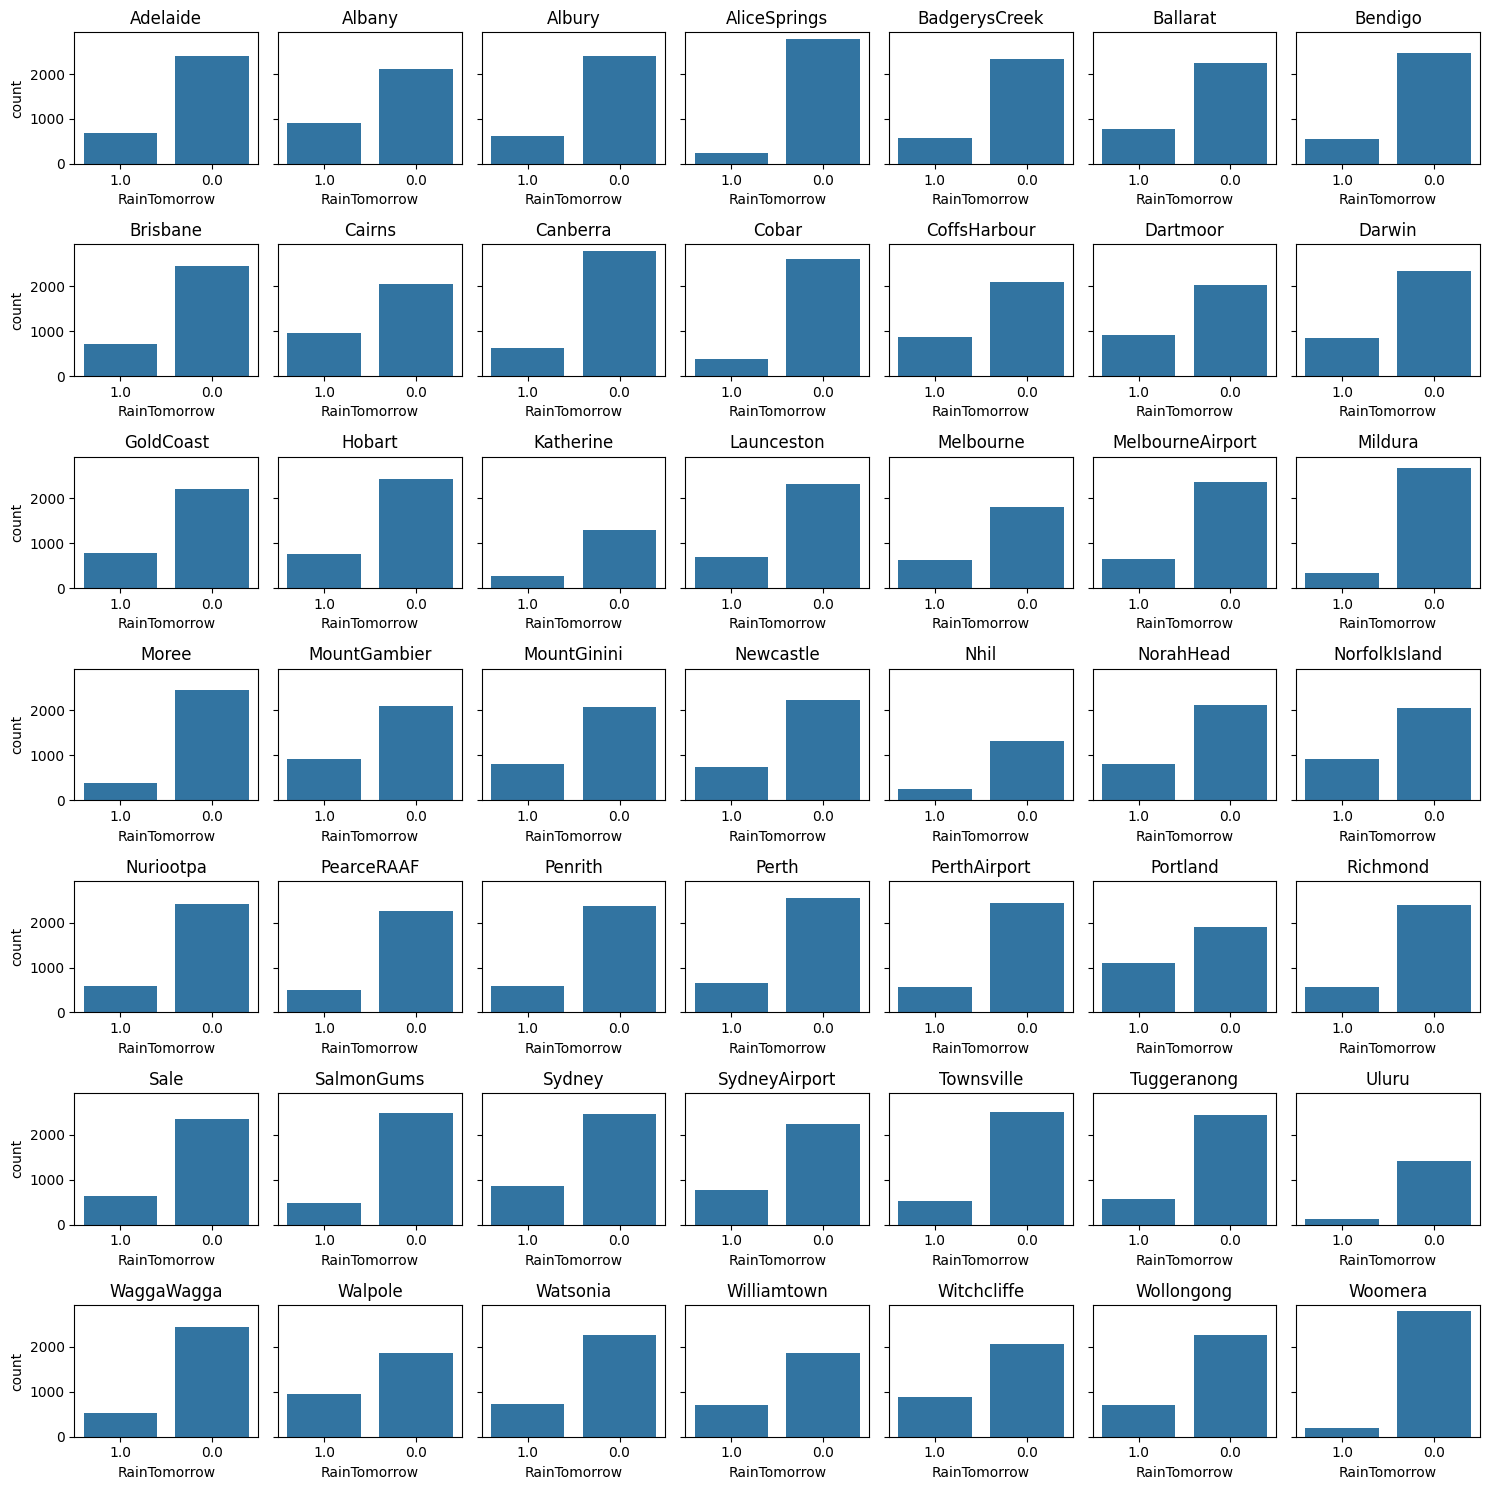

In [ ]:
locations = sorted(raindf['Location'].unique())
fig,ax = plt.subplots(7,7, figsize=(15,15),sharey=True,tight_layout=True)
ax_flat = ax.flatten()
for i,location in enumerate(locations):
    sns.countplot(data = raindf[raindf.Location == location], x = 'RainTomorrow', order = [1.0,0.], ax=ax_flat[i])
    ax_flat[i].set_title(location)

Text(0.5, 1.0, 'All Locations')

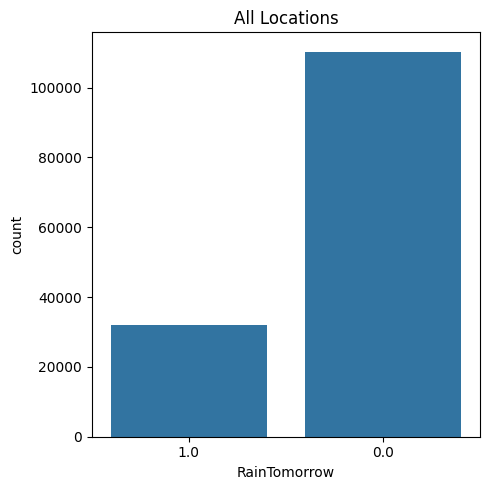

In [ ]:
fig, ax = plt.subplots(figsize=(5,5), sharey=True, tight_layout=True)

sns.countplot(data=raindf, x='RainTomorrow', order=[1.0, 0.], ax=ax)
ax.set_title('All Locations')

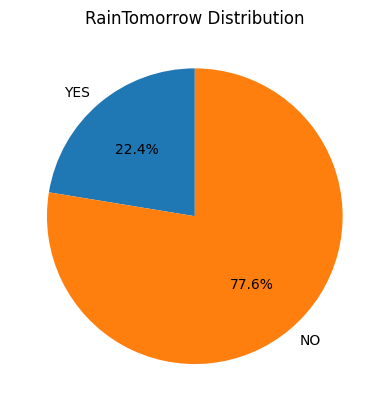

In [ ]:
RainTomorrow_count = raindf[raindf.RainTomorrow == 1.0].shape[0]

NoRainTomorrow_count = len(raindf) - RainTomorrow_count

labels = ['YES', 'NO']
sizes = [RainTomorrow_count, NoRainTomorrow_count]

# Tạo biểu đồ tròn
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('RainTomorrow Distribution')
# Hiển thị biểu đồ
plt.show()


Nhận thấy dữ liệu đang bị mất cân bằng, số lượng lớp 'Yes' quá ít, điều này khiến các mô hình sẽ thiên lệch về phía lớp 'No' hơn có thể gây ra tình trạng overfitting

In [ ]:
raindf_X = raindf_X.drop(['location', 'Date'],axis=1)
raindf_y = raindf['RainTomorrow']
raindf_X

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.189528 -0.045912 -0.206727     0.126579 -0.323907       0.295517   
1      -0.747494  0.263181 -0.277606     0.365327  0.601652       0.295517   
2       0.111443  0.347479 -0.277606     0.460826  1.368544       0.442698   
3      -0.466387  0.670622 -0.277606    -0.350918  0.892542      -1.176289   
4       0.829827  1.274759 -0.159474     0.604075 -1.381688       0.074746   
...          ...       ...       ...          ...       ...            ...   
142188 -1.356559 -0.200459 -0.277606     0.317577  0.495874      -0.661157   
142189 -1.465878  0.024336 -0.277606    -0.589666  0.680986      -0.661157   
142190 -1.340942  0.291280 -0.277606    -0.398668  0.337207      -1.323469   
142191 -1.059835  0.516076 -0.277606     0.269828  0.892542      -0.219615   
142192 -0.685026  0.530125 -0.277606     3.612304  0.866097      -0.881927   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.674441      0.609137     0.113179    -1.417590  ...   
1          -1.124665      0.381950    -1.304053    -1.273343  ...   
2           0.561997      0.836324    -1.618994    -1.032932  ...   
3          -0.337556     -1.094767    -1.251563    -1.706083  ...   
4          -0.787332      0.154763     0.690569    -0.888685  ...   
...              ...           ...          ...          ...  ...   
142188      0.112221     -0.640392    -0.516702    -1.177179  ...   
142189     -0.112668     -0.867580    -0.936623    -1.321425  ...   
142190     -0.112668     -1.094767    -0.674172    -1.465672  ...   
142191     -0.562444     -1.094767    -0.831643    -1.321425  ...   
142192     -0.112668     -1.321954    -0.936623    -1.321425  ...   

        WindGustDir_x  WindGustDir_y  WindDir9am_x  WindDir9am_y  \
0           -1.377831       0.068625     -1.467070     -0.016728   
1           -1.271141       0.615735     -0.578536      1.267783   
2           -1.271141      -0.478485     -1.467070     -0.016728   
3            1.018479       1.078565      0.991160     -0.999574   
4           -1.377831       0.068625      1.303658      0.515704   
...               ...            ...           ...           ...   
142188       1.429796       0.068625      1.303658     -0.549161   
142189       1.429796       0.068625      0.991160     -0.999574   
142190      -0.511678       1.388547      0.991160     -0.999574   
142191       0.025983       1.497112      0.991160     -0.999574   
142192       1.018479      -0.941315      0.524571     -1.301240   

        WindDir3pm_x  WindDir3pm_y       Lat       Lon  month_sin  month_cos  
0          -1.272296      0.613279 -0.606721  0.532649  -0.015522   1.434209  
1          -1.272296     -0.480026 -0.606721  0.532649  -0.015522   1.434209  
2          -1.272296     -0.480026 -0.606721  0.532649  -0.015522   1.434209  
3           1.430477      0.066626 -0.606721  0.532649  -0.015522   1.434209  
4          -0.967462      1.075721 -0.606721  0.532649  -0.015522   1.434209  
...              ...           ...       ...       ...        ...        ...  
142188      1.430477      0.066626 -0.273003  0.308194  -0.015522  -1.387770  
142189      1.323715      0.613279 -0.273003  0.308194  -0.015522  -1.387770  
142190      0.025709      1.493917 -0.273003  0.308194  -0.015522  -1.387770  
142191     -1.272296      0.613279 -0.273003  0.308194  -0.015522  -1.387770  
142192      0.025709      1.493917 -0.273003  0.308194  -0.015522  -1.387770  

[142193 rows x 27 columns]

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Initialize SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(raindf_X, raindf_y)
print(pd.Series(y_resampled).value_counts())

raindf_X, raindf_y = X_resampled, y_resampled

0.0    110316
1.0    110316
Name: RainTomorrow, dtype: int64


# Giảm chiều dữ liệu

In [ ]:
from sklearn.decomposition import PCA

temp_hum_feat = ['Temp9am','Temp3pm','MinTemp','MaxTemp','Humidity9am','Humidity3pm']

wind_feat = ['WindSpeed9am','WindSpeed3pm','WindGustSpeed']

press_feat = ['Pressure9am','Pressure3pm']
cloud_feat = ['Cloud9am', 'Cloud3pm']

for f_set in [temp_hum_feat,wind_feat,press_feat, cloud_feat]:
    pca = PCA()
    pca.fit(raindf_X[f_set])
    print(list(map(lambda r: np.round(r,3), pca.explained_variance_ratio_)))

[0.669, 0.24, 0.068, 0.017, 0.005, 0.002]
[0.756, 0.146, 0.099]
[0.98, 0.02]
[0.807, 0.193]


In [ ]:
n_th_pc = 3   
n_wind_pc = 2  
n_press_pc = 1 

In [ ]:

from sklearn.compose import ColumnTransformer
feat_to_drop = ['MinTemp', 'MaxTemp','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 
        ]
# create triples of name, action, feature list
txmap = [('pc3',PCA(n_components=n_th_pc),temp_hum_feat),
         ('pc2',PCA(n_components=n_wind_pc),wind_feat),
         ('pc1',PCA(n_components=n_press_pc),press_feat),
         ('drop','drop', feat_to_drop)]

colxformer1 = ColumnTransformer(transformers=txmap, remainder='passthrough')

X = colxformer1.fit_transform(raindf_X)
X

array([[-0.65373709,  1.14569511, -0.61146813, ...,  0.53264858,
        -0.01552162,  1.43420923],
       [-1.01692086,  2.13264643,  0.20267451, ...,  0.53264858,
        -0.01552162,  1.43420923],
       [-1.60937362,  1.54516665,  0.83372883, ...,  0.53264858,
        -0.01552162,  1.43420923],
       ...,
       [-1.99862731, -2.29031577, -0.24645478, ...,  0.53138206,
         1.33343162,  0.2796882 ],
       [ 2.06620518, -0.09951419,  0.48862631, ...,  0.54517615,
         1.2125163 , -0.68227551],
       [-3.70553159,  1.53949172,  0.61809614, ...,  0.5507541 ,
        -1.24355954,  0.72871432]])

In [ ]:
Y = raindf_y
Y



0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
220627    1.0
220628    1.0
220629    1.0
220630    1.0
220631    1.0
Name: RainTomorrow, Length: 220632, dtype: float64

# Xây dựng mô hình phân cụm

In [ ]:
new_data = data_clustering.groupby(['Lat', 'Lon'])[data_clustering.drop(['Lat', 'Lon','month_sin', 'month_cos', 'RainToday'], axis=1).columns].mean()
new_data.shape

C:\Users\ledin\AppData\Local\Temp\ipykernel_10704\3909711242.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_data = data_clustering.groupby(['Lat', 'Lon'])[data_clustering.drop(['Lat', 'Lon','month_sin', 'month_cos', 'RainToday'], axis=1).columns].mean()


(49, 22)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
scaler = MinMaxScaler ()
dt_scaled = scaler.fit_transform (new_data)
dt_scaled

array([[0.27623938, 0.26218208, 0.21199952, ..., 1.        , 0.36652836,
        0.44099935],
       [0.21266152, 0.30924691, 0.2900103 , ..., 0.84263702, 0.113982  ,
        1.        ],
       [0.26334106, 0.34714156, 0.30371583, ..., 0.73142796, 0.14509015,
        0.26846407],
       ...,
       [0.27181735, 0.4582273 , 0.08393371, ..., 0.59750141, 0.09914862,
        0.36569248],
       [0.45331329, 0.55916685, 0.31266567, ..., 0.53860734, 0.43569736,
        0.48087763],
       [0.50809386, 0.5316648 , 0.50817774, ..., 0.7316779 , 0.54024544,
        0.27008248]])

In [ ]:
dt_scaled = pd.DataFrame(dt_scaled, columns=new_data.columns)
new_data = dt_scaled

In [ ]:
# new_data = dt_scaled.groupby(['Lat', 'Lon'])[dt_scaled.drop(['Lat', 'Lon'], axis=1).columns].mean()
# new_data = data_clustering_scaled_df.groupby(['Lat', 'Lon'])[data_clustering_scaled_df.drop(['Lat', 'Lon', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Cloud9am', 'Temp9am', 'Temp3pm', 'WindDir9am_x', 'WindDir9am_y', 'WindDir3pm_x', 'WindDir3pm_y'], axis=1).columns].mean()



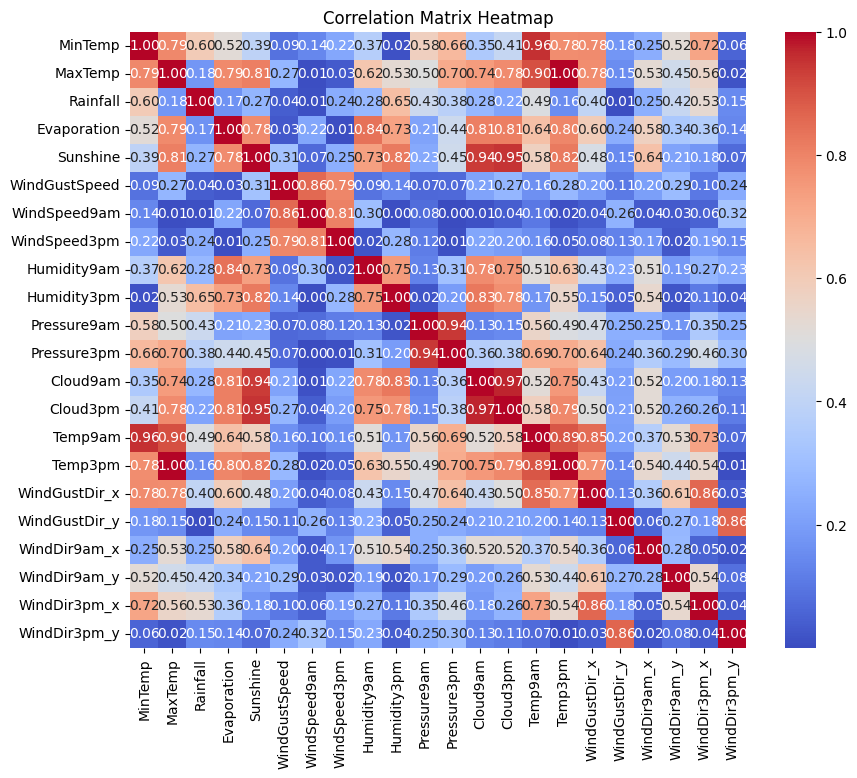

In [ ]:
correlation_matrix = new_data.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
high_correlation = np.where(correlation_matrix > 0.9)
high_correlation = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*high_correlation) if x != y and x < y]

for col1, col2 in high_correlation:
    if col1 in new_data.columns and col2 in new_data.columns:
        if correlation_matrix.loc[col1, 'Rainfall'] > correlation_matrix.loc[col2, 'Rainfall']:
            new_data.drop(col2, axis=1, inplace=True)
        else:
            new_data.drop(col1, axis=1, inplace=True)

In [ ]:
new_data.shape

(49, 17)

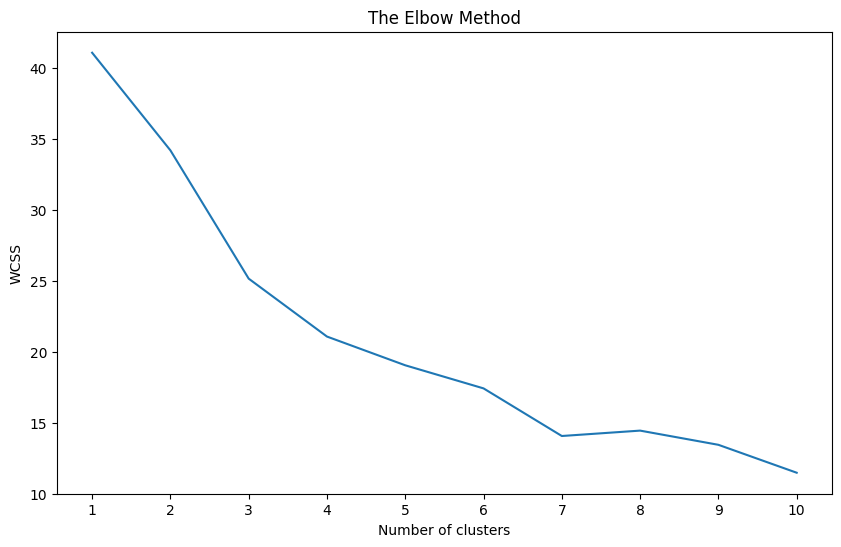

In [ ]:
from sklearn.cluster import KMeans
wcss = []
kmeans_set = {'init':'k-means++', 'random_state':42}
max_possible_clusters = 10
for i in range(1, max_possible_clusters + 1):
    kmeans = KMeans(n_clusters=i, **kmeans_set)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))    
plt.plot(range(1, max_possible_clusters + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks (range (1, 11))
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, max_possible_clusters + 1):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(new_data)
    score = silhouette_score(new_data, kmeans.labels_)
    silhouette_coefficients.append(score)

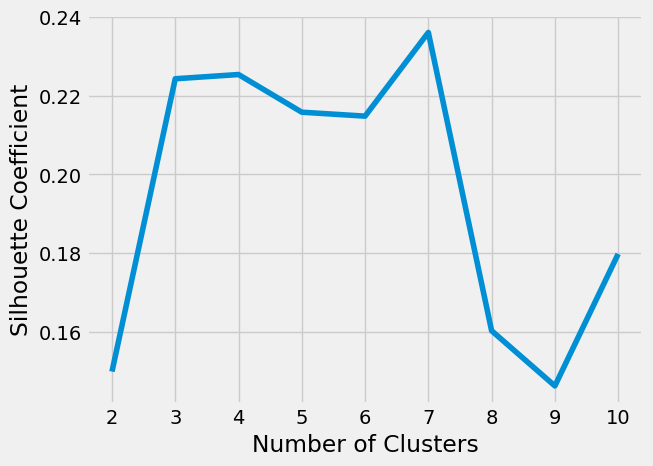

In [ ]:
plt.style.use ('fivethirtyeight')
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

Quyết định chọn số cụm là 3 vì có silhouette_score cao và 3 cũng là điểm Elbow

In [ ]:
number_of_clusters = 3
x = new_data.values

kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
y_kmeans_pred = kmeans.fit_predict(x)

In [ ]:
y_kmeans_pred

array([2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 2, 1, 1])

In [ ]:
# dt_cluster = pd.concat([new_data, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
dt_cluster = pd.concat([new_data.reset_index(), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

dt_cluster

index   MinTemp   MaxTemp  Rainfall  Evaporation  WindGustSpeed  \
0       0  0.276239  0.262182  0.212000     0.035660       1.000000   
1       1  0.212662  0.309247  0.290010     0.061781       0.384188   
2       2  0.263341  0.347142  0.303716     0.017902       0.762486   
3       3  0.415010  0.391779  0.250278     0.187258       0.894199   
4       4  0.330201  0.392701  0.257861     0.194216       0.509333   
5       5  0.322067  0.375759  0.183413     0.195602       0.971676   
6       6  0.188077  0.279801  0.230617     0.068039       0.870683   
7       7  0.251374  0.424586  0.216469     0.153962       0.550008   
8       8  0.298906  0.468391  0.272300     0.207035       0.245385   
9       9  0.000000  0.000000  0.515331     0.037946       0.916886   
10     10  0.182355  0.388072  0.314447     0.141919       0.361854   
11     11  0.161538  0.397383  0.236133     0.160996       0.607017   
12     12  0.300971  0.482575  0.231768     0.271439       0.432932   
13     13  0.457980  0.481800  0.206059     0.366700       0.430392   
14     14  0.290657  0.428270  0.169837     0.261027       0.646646   
15     15  0.576866  0.418527  0.588701     0.251533       0.904980   
16     16  0.360991  0.563906  0.086693     0.388799       0.463775   
17     17  0.362571  0.427941  0.460191     0.203505       0.610448   
18     18  0.574053  0.500639  0.479500     0.285645       0.987310   
19     19  0.381936  0.528642  0.325870     0.203399       0.280271   
20     20  0.572526  0.484485  0.541419     0.275887       0.669020   
21     21  0.598070  0.467334  0.550450     0.218364       0.726110   
22     22  0.287941  0.538126  0.103501     0.327520       0.597706   
23     23  0.467814  0.534246  0.551350     0.469114       0.713311   
24     24  0.473087  0.572275  0.270086     0.340883       0.345310   
25     25  0.455554  0.593825  0.242491     0.349490       0.827010   
26     26  0.445820  0.625326  0.216128     0.486506       0.785518   
27     27  0.482910  0.606689  0.121449     0.529434       0.439825   
28     28  0.493043  0.637298  0.000000     1.000000       0.815740   
29     29  0.547092  0.524017  0.867544     0.153047       0.582540   
30     30  0.673589  0.432029  0.501620     0.206553       0.749804   
31     31  0.699499  0.603271  0.608043     0.332028       0.742600   
32     32  0.652345  0.633063  0.505475     0.311559       0.000000   
33     33  0.549161  0.803795  0.041422     0.877142       0.681516   
34     34  0.483638  0.754534  0.071960     0.846858       0.636770   
35     35  0.856585  0.759482  0.577453     0.576430       0.548910   
36     36  0.896875  0.767327  1.000000     0.432670       0.511373   
37     37  0.857722  1.000000  0.500630     0.610760       0.548049   
38     38  1.000000  0.896947  0.878231     0.450560       0.640165   
39     39  0.392457  0.546724  0.313990     0.252063       0.342724   
40     40  0.473672  0.357870  0.337769     0.125343       0.597039   
41     41  0.421400  0.379097  0.450640     0.143848       0.598093   
42     42  0.249797  0.366129  0.194603     0.069320       0.733076   
43     43  0.301985  0.270393  0.389120     0.009628       0.718213   
44     44  0.466320  0.652377  0.216706     0.638475       0.603317   
45     45  0.252774  0.341266  0.315798     0.000000       0.553578   
46     46  0.271817  0.458227  0.083934     0.253215       0.742353   
47     47  0.453313  0.559167  0.312666     0.246113       0.185576   
48     48  0.508094  0.531665  0.508178     0.253511       0.229389   

    WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0       0.721587      0.594940     0.569406     0.636006     0.375202   
1       0.171208      0.309306     0.872341     0.731247     0.641307   
2       0.804954      0.770091     0.785234     0.732713     0.861218   
3       0.913173      0.731918     0.606192     0.590430     0.831314   
4       0.273506      0.282197     0.849602     0.675380     0.874597   
5       1.00000

In [ ]:
# fig = plt.figure(figsize=(20,15))
# ax = fig.add_subplot(221)

# sns.scatterplot(data=dt_cluster, x=dt_cluster['Lon'], y=dt_cluster['Lat'], hue=dt_cluster['cluster'], 
#                 palette=sns.color_palette('hls', 3))
# ax.set_title('KMeans with 3 Clusters')

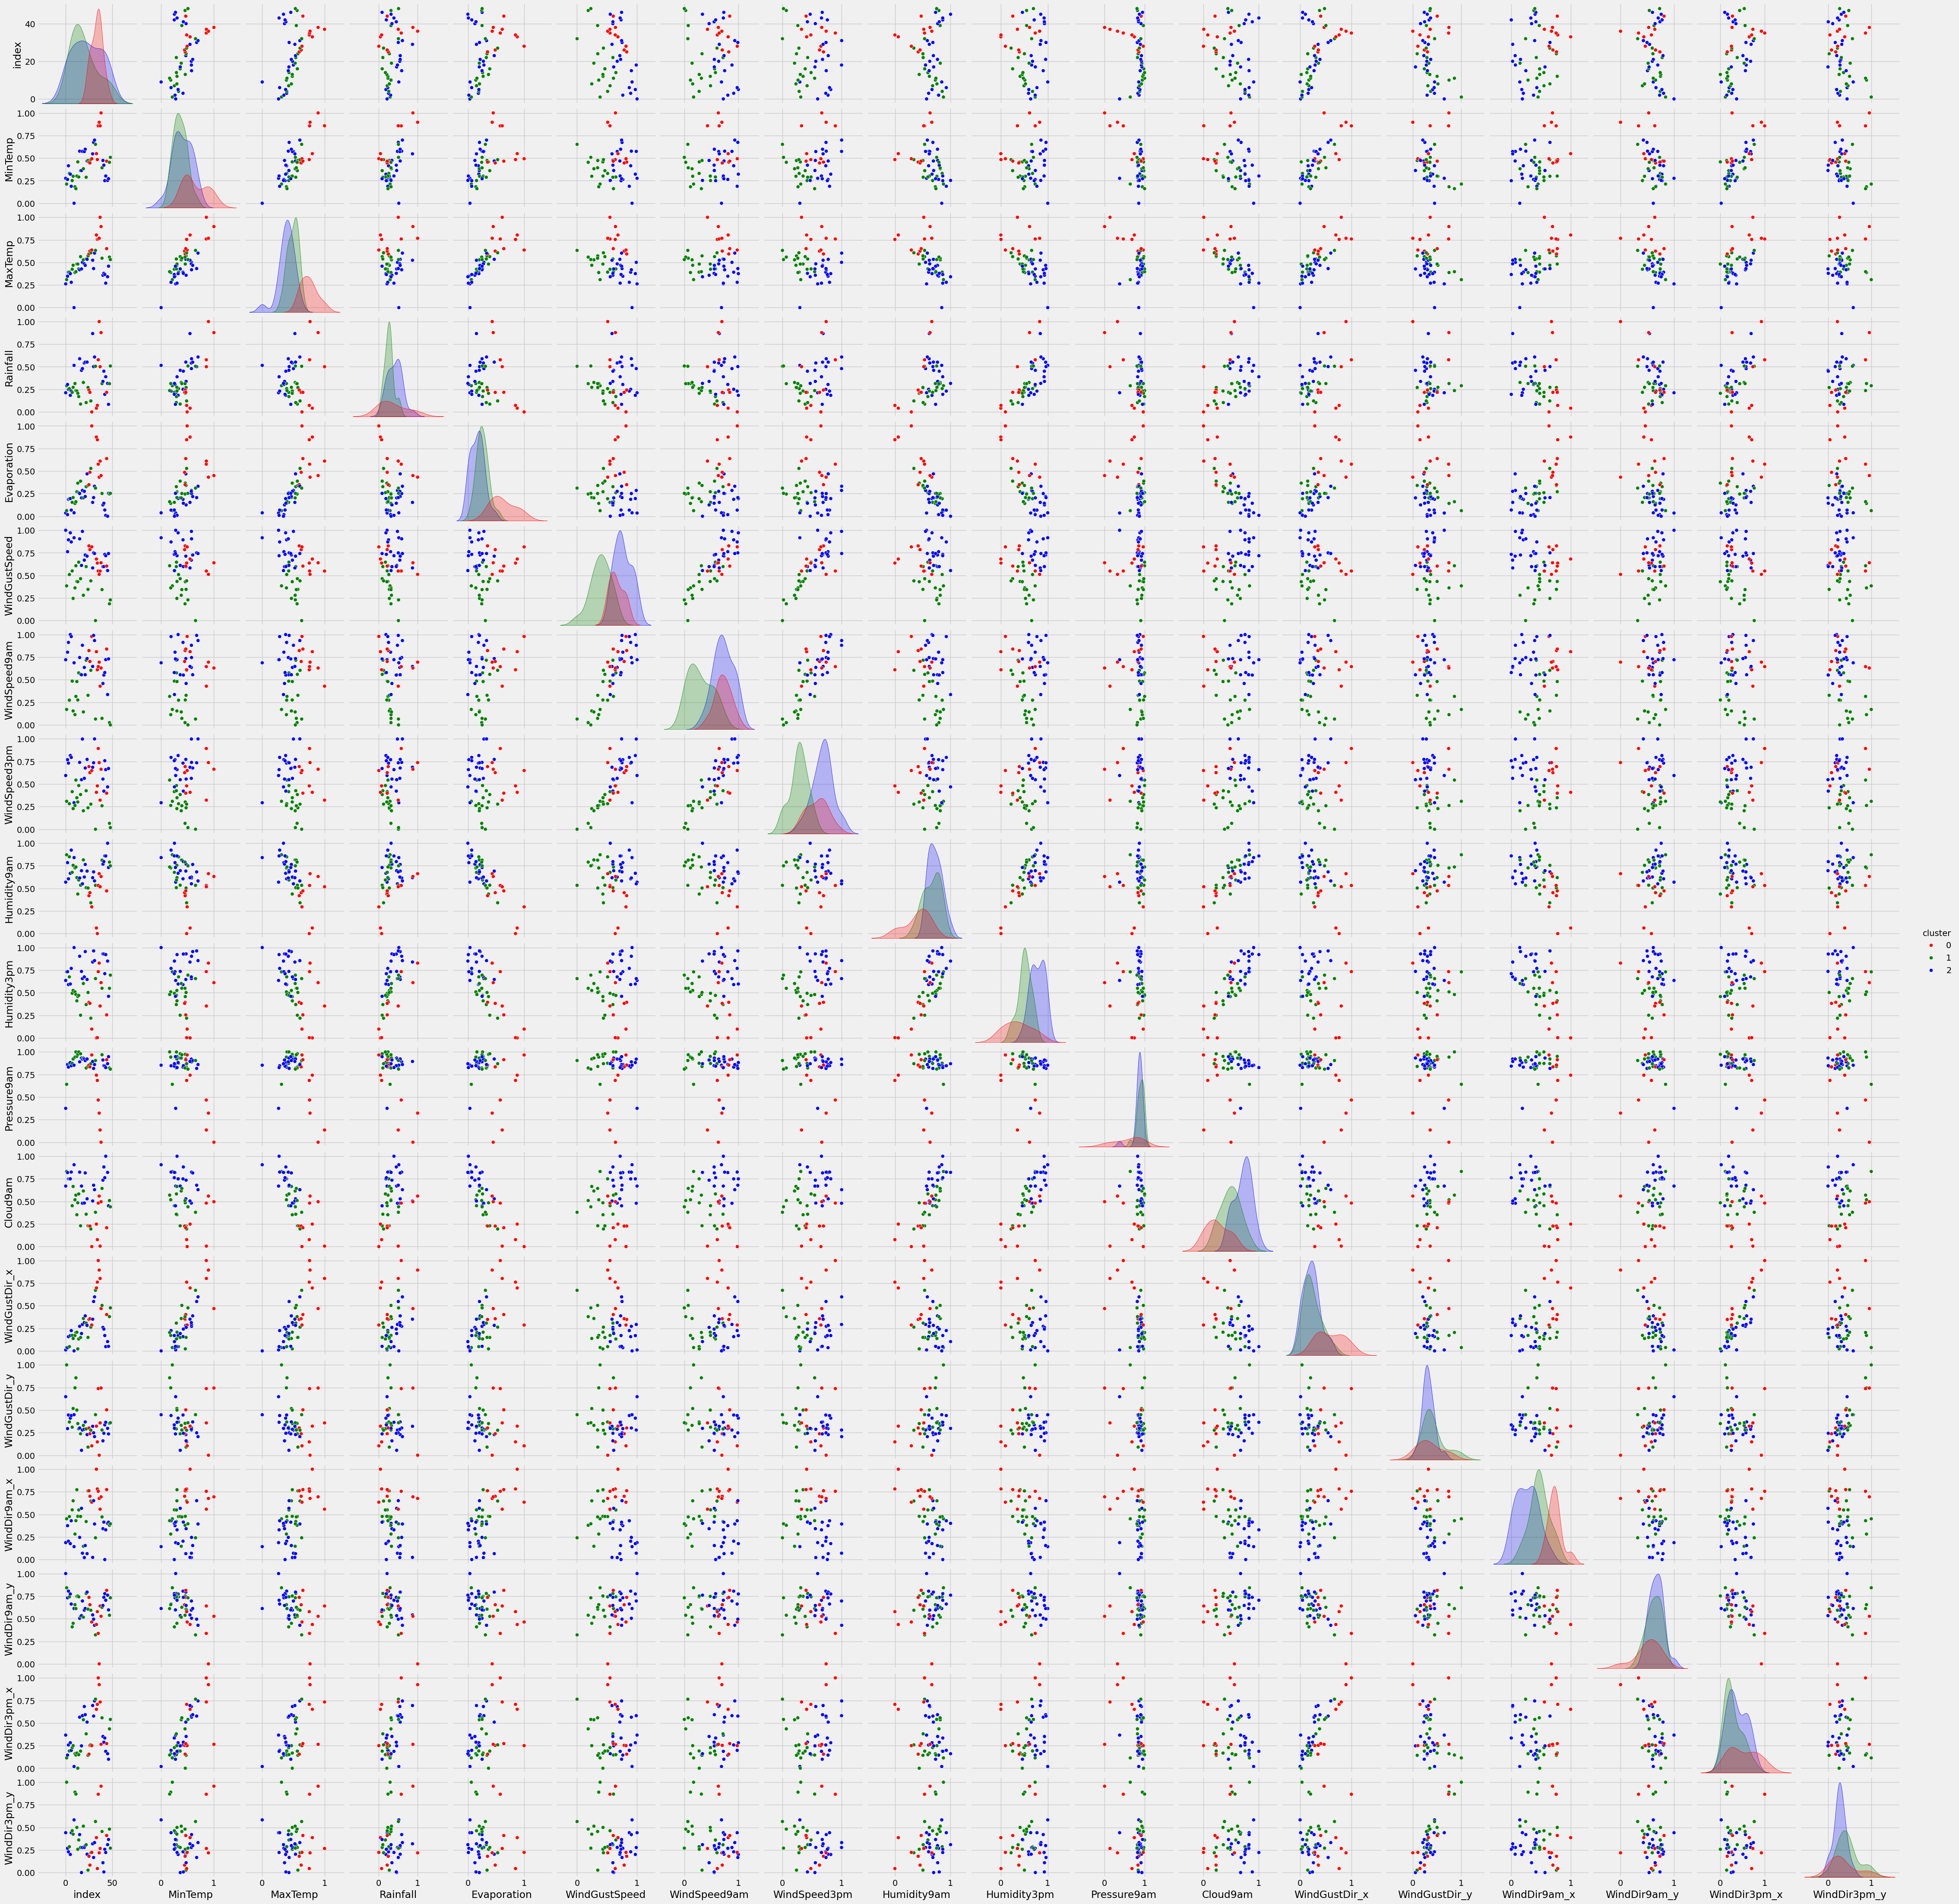

In [ ]:
cluster_colors = ['red', 'green', 'blue']

sns.pairplot(dt_cluster, hue="cluster", palette=cluster_colors)

In [ ]:
dt_cluster.columns

Index(['index', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Cloud9am', 'WindGustDir_x',
       'WindGustDir_y', 'WindDir9am_x', 'WindDir9am_y', 'WindDir3pm_x',
       'WindDir3pm_y', 'cluster'],
      dtype='object')

Text(0.5, 1.0, 'Evaporation vs Class of k_mean')

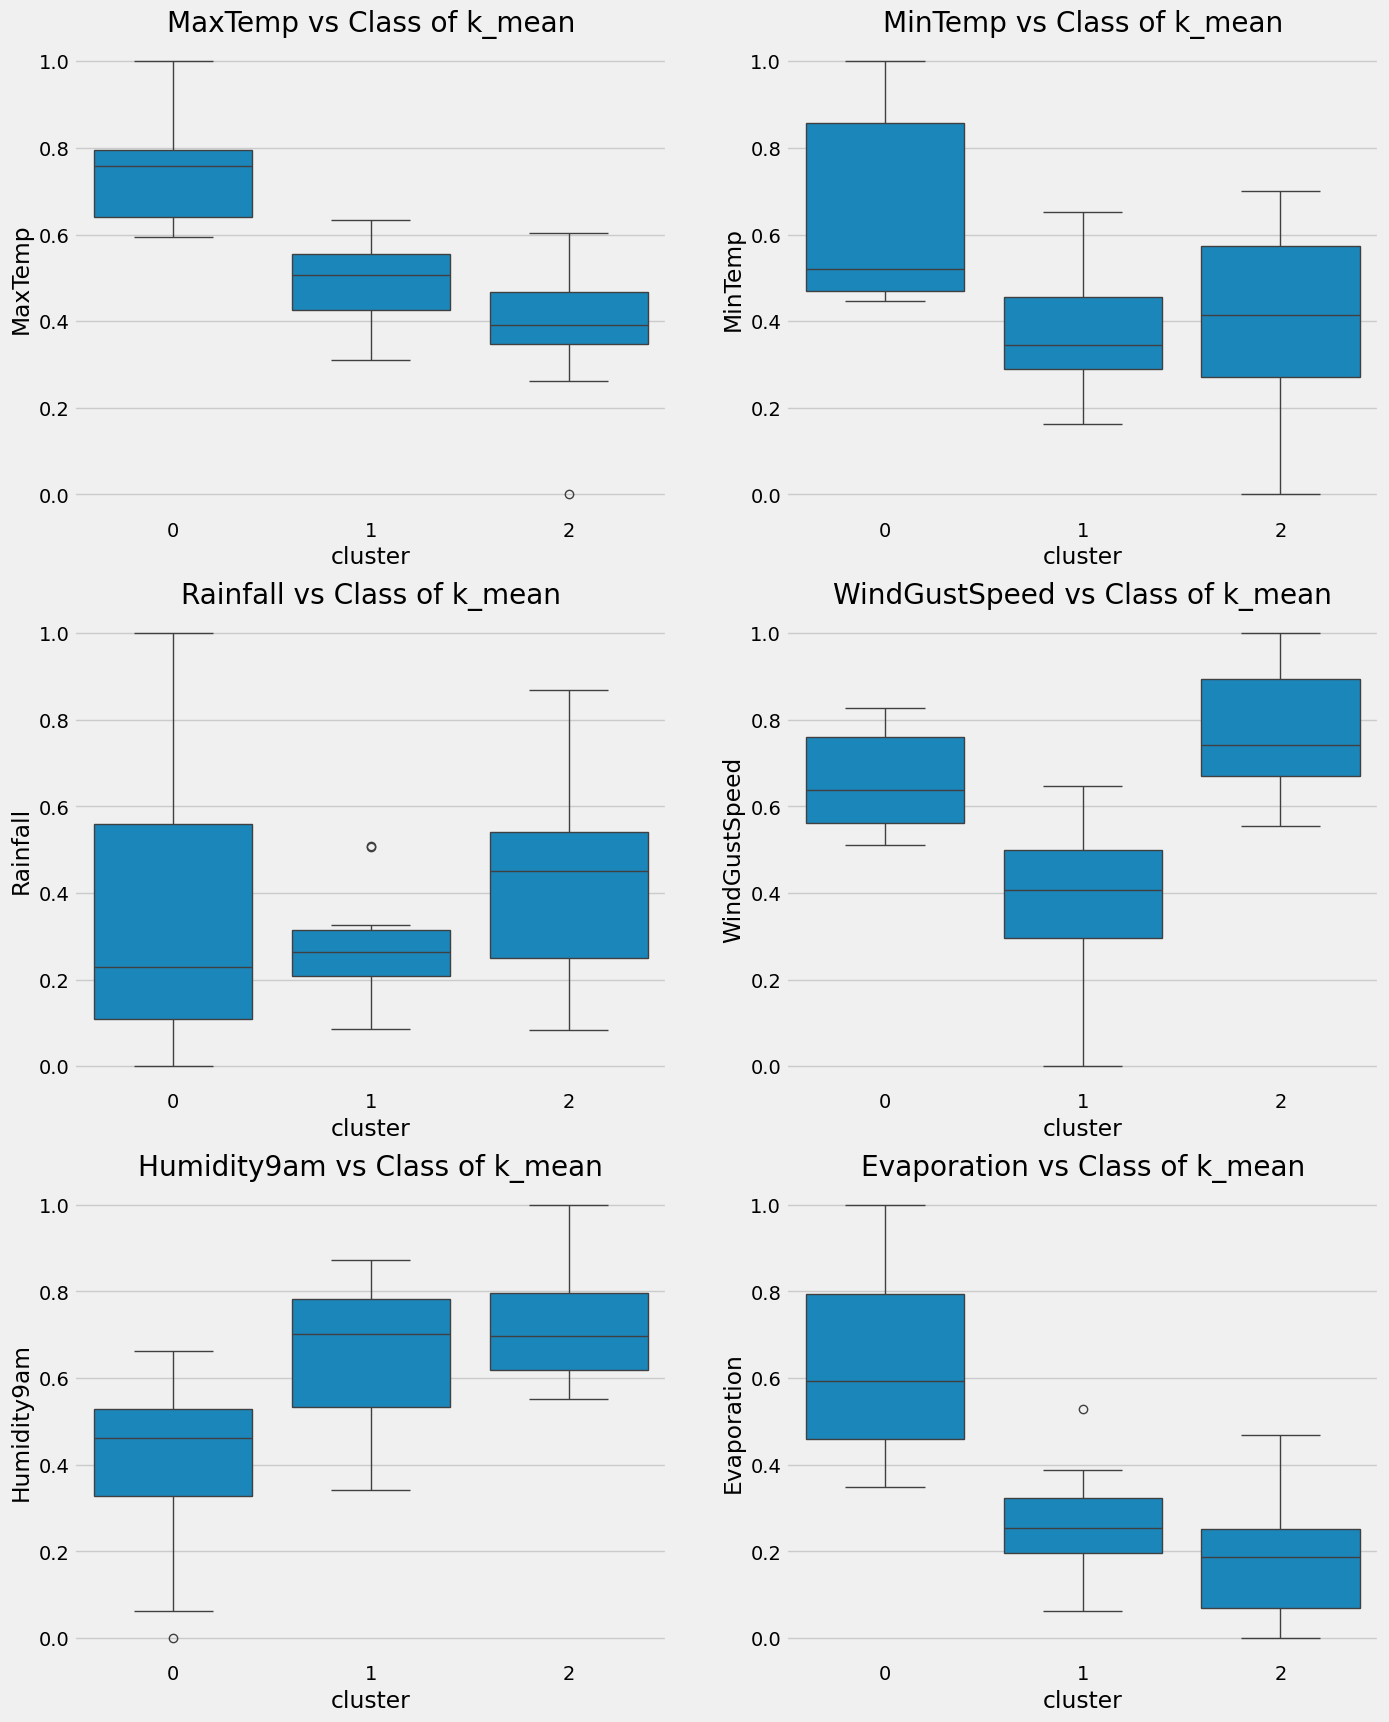

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

plt.subplot(3, 2, 1)
sns.boxplot(x='cluster', y='MaxTemp', data=dt_cluster)
plt.title('MaxTemp vs Class of k_mean')

plt.subplot(3, 2, 2)
sns.boxplot(x='cluster', y='MinTemp', data=dt_cluster)
plt.title('MinTemp vs Class of k_mean')

plt.subplot(3, 2, 3)
sns.boxplot(x='cluster', y='Rainfall', data=dt_cluster)
plt.title('Rainfall vs Class of k_mean')

plt.subplot(3, 2, 4)
sns.boxplot(x='cluster', y='WindGustSpeed', data=dt_cluster)
plt.title('WindGustSpeed vs Class of k_mean')

plt.subplot(3,2,5)
sns.boxplot(x = 'cluster', y = 'Humidity9am', data  = dt_cluster)
plt.title('Humidity9am vs Class of k_mean')

plt.subplot(3,2,6)
sns.boxplot(x = 'cluster', y = 'Evaporation', data  = dt_cluster)
plt.title('Evaporation vs Class of k_mean')

# plt.subplot(3,2,6)
# sns.boxplot(x = 'cluster', y = 'exports', data  = dt_cluster)
# plt.title('exports vs Class of k_mean')
# plt.show()

Từ sự phân bố của nhiệt độ, lượng mưa, độ ẩm, tốc độ giá của các nhóm ta có thể kết luận\
Nhóm 0: Thời tiết nóng khô\
=> nguyên nhân: Nhiệt độ cao, lượng mưa phân bố rộng, tốc độ gió trung bình cao, độ ẩm thấp, chỉ số bay hơi cao.\
Nhóm 2: "Thời tiết ôn hòa"\
=> nguyên nhân: Nhiệt độ trung bình thấp, lượng mưa thấp, tốc độ gió nhỏ, độ ẩm vừa và cao, chỉ số bay hơi trung bình thấp.\
Nhóm 3: "Thời tiết lạnh và ẩm ướt"\
=> nguyên nhân: Nhiệt độ thấp nhất, lượng mưa từ vừa đến lớn, tốc độ gió và độ ẩm cao nhất, chỉ số bay hơi thấp.

# Xây dựng các mô hình dự đoán


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(141204, 22)

In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    time_taken = time.time() - t0
    
    print(f"Accuracy = {accuracy}")
    print(f"Time taken = {time_taken}")
    print(classification_report(y_test,y_pred,digits=5))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    norm = plt.Normalize(-100,100)
    sns.heatmap(cf_matrix, annot=True)
    
    return model, accuracy, time_taken

# Random Forest

Accuracy = 0.883912637035778
Time taken = 17.206905126571655
              precision    recall  f1-score   support

         0.0    0.88881   0.87868   0.88372     17722
         1.0    0.87908   0.88919   0.88411     17579

    accuracy                        0.88391     35301
   macro avg    0.88395   0.88393   0.88391     35301
weighted avg    0.88397   0.88391   0.88391     35301



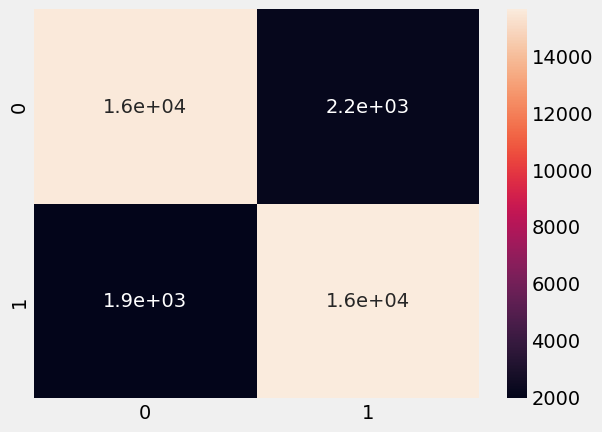

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 50,
             'random_state': 1000}

rf_model = RandomForestClassifier(**rf_params)
rf_model, rf_accuracy,  rf_tt = run_model(rf_model, x_train, y_train, x_val, y_val)

# XGBoost

Accuracy = 0.9122404464462763
Time taken = 8.48760437965393
              precision    recall  f1-score   support

         0.0    0.89696   0.93229   0.91428     17722
         1.0    0.92891   0.89203   0.91010     17579

    accuracy                        0.91224     35301
   macro avg    0.91294   0.91216   0.91219     35301
weighted avg    0.91287   0.91224   0.91220     35301



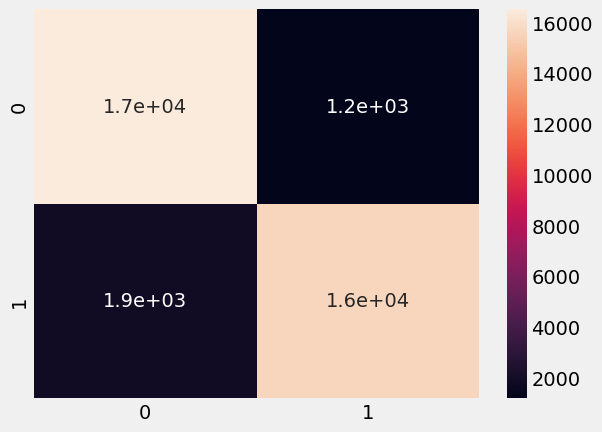

In [ ]:
import xgboost as xgb
xgb_params ={'n_estimators': 500,
            'max_depth': 16}

xgb_model = xgb.XGBClassifier(**xgb_params)
xgb_model, xgb_accuracy,  xgb_tt = run_model(xgb_model, x_train, y_train, x_val, y_val)

# DECISION TREE

Accuracy = 0.823985315113196
Time taken = 2.8670079708099365
              precision    recall  f1-score   support

         0.0    0.81786   0.83218   0.82496     21994
         1.0    0.83028   0.81584   0.82300     22133

    accuracy                        0.82399     44127
   macro avg    0.82407   0.82401   0.82398     44127
weighted avg    0.82409   0.82399   0.82398     44127



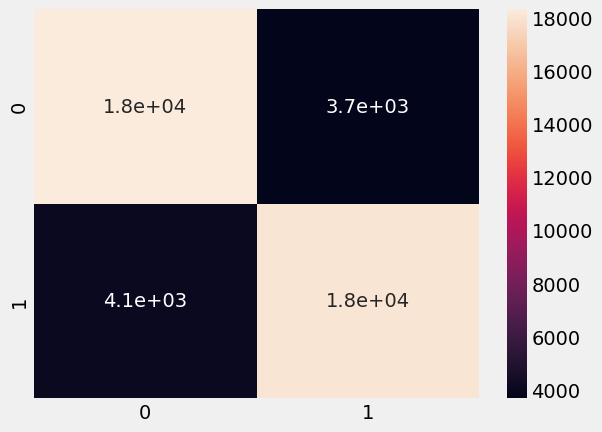

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {'max_depth': 23,
             'min_samples_leaf': 2,
             'min_samples_split': 3,
             'random_state': 42}
dt_model = DecisionTreeClassifier(**dt_params)
dt_model, dt_accuracy, dt_tt = run_model(dt_model, x_train, y_train, x_test, y_test)

# KNN

Accuracy = 0.8398939424841934
Time taken = 4.862431764602661
              precision    recall  f1-score   support

         0.0    0.92991   0.73411   0.82049     21994
         1.0    0.78150   0.94501   0.85551     22133

    accuracy                        0.83989     44127
   macro avg    0.85570   0.83956   0.83800     44127
weighted avg    0.85547   0.83989   0.83806     44127



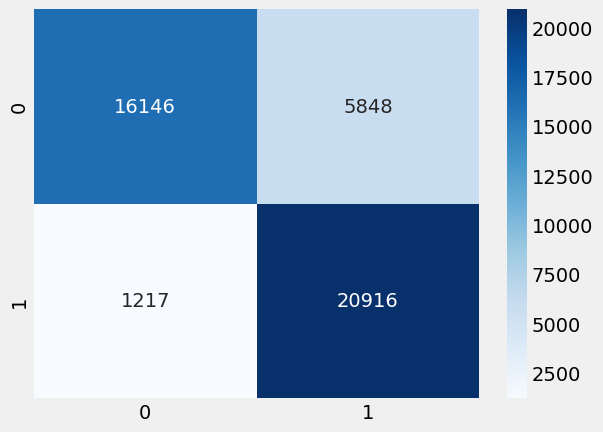

KNN Model Accuracy: 0.8398939424841934
Time taken to train and test the KNN model: 4.862431764602661 seconds


In [ ]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0 = time.time()
    if verbose == False:
        model.fit(X_train, y_train, verbose=0)
    else:
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    time_taken = time.time() - t0
    
    print(f"Accuracy = {accuracy}")
    print(f"Time taken = {time_taken}")
    print(classification_report(y_test, y_pred, digits=5))
    
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.show()
    
    return model, accuracy, time_taken

knn_params = {'n_neighbors': 5,  
              'weights': 'uniform',  
              'algorithm': 'auto', 
              'leaf_size': 30,  
              'p': 2,  
              'metric': 'minkowski', 
              'n_jobs': -1}  

knn_model = KNeighborsClassifier(**knn_params)



# Chạy model với hàm run_model
knn_model, knn_accuracy, knn_tt = run_model(knn_model, x_train, y_train, x_test, y_test)

# In kết quả
print(f"KNN Model Accuracy: {knn_accuracy}")
print(f"Time taken to train and test the KNN model: {knn_tt} seconds")


# Gradient Boosting


Accuracy = 0.9045482357740159
Time taken = 425.5334572792053
              precision    recall  f1-score   support

         0.0    0.88015   0.93594   0.90719     21994
         1.0    0.93206   0.87336   0.90175     22133

    accuracy                        0.90455     44127
   macro avg    0.90611   0.90465   0.90447     44127
weighted avg    0.90619   0.90455   0.90446     44127



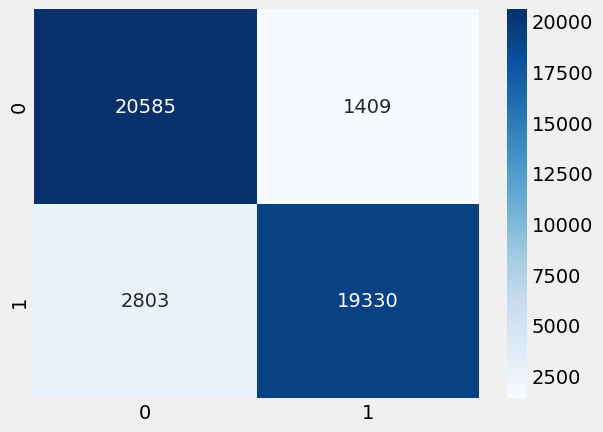

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_params = {'n_estimators': 500,  
             'learning_rate': 0.1,  
             'max_depth': 4,  
             'min_samples_split': 2,  
             'min_samples_leaf': 1,  
             'random_state': 42}  

gb_model = GradientBoostingClassifier(**gb_params)

gb_model, gb_accuracy, gb_tt = run_model(gb_model, x_train, y_train, x_test, y_test)



# Logistic Regression

Accuracy = 0.7702313776146124
Time taken = 0.7512812614440918
              precision    recall  f1-score   support

         0.0    0.76971   0.76912   0.76942     21994
         1.0    0.77074   0.77134   0.77104     22133

    accuracy                        0.77023     44127
   macro avg    0.77023   0.77023   0.77023     44127
weighted avg    0.77023   0.77023   0.77023     44127



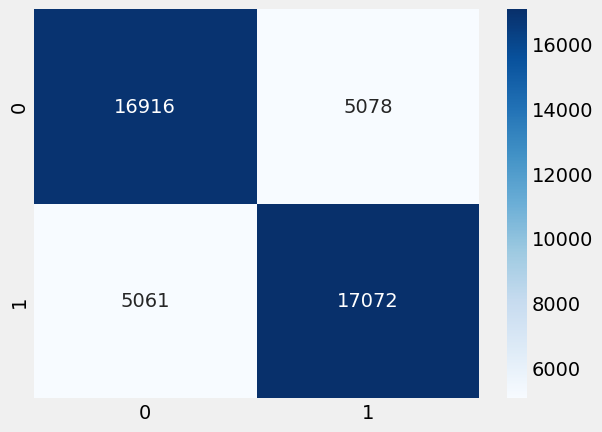

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


logreg = LogisticRegression(solver='liblinear', random_state = 0)

logreg, accuracy, tt = run_model(logreg, x_train, y_train, x_test, y_test)



# SVM

c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy = 0.770888571622816
Time taken = 35.56482434272766
              precision    recall  f1-score   support

         0.0    0.77063   0.76930   0.76997     21994
         1.0    0.77114   0.77247   0.77180     22133

    accuracy                        0.77089     44127
   macro avg    0.77089   0.77088   0.77088     44127
weighted avg    0.77089   0.77089   0.77089     44127



c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


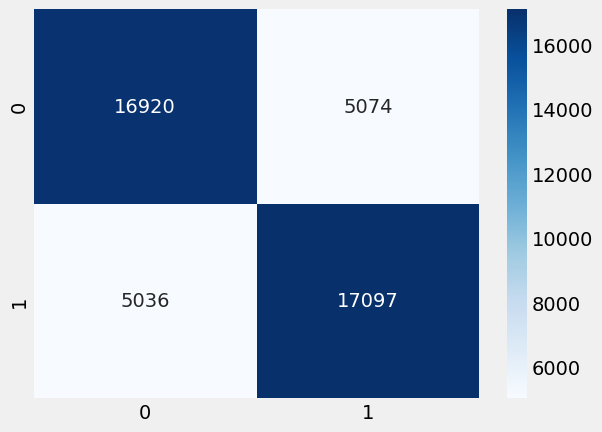

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler


clf_svc = LinearSVC()
clf_svc, accuracy, tt = run_model(clf_svc, x_train  , y_train, x_test, y_test)


# FNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(22,)))  
model.add(Dense(units=256, activation='relu'))  
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=25, validation_data=(x_val, y_val))


c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7856 - loss: 0.4515 - val_accuracy: 0.8010 - val_loss: 0.4224
Epoch 2/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8061 - loss: 0.4149 - val_accuracy: 0.8122 - val_loss: 0.4072
Epoch 3/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8181 - loss: 0.3950 - val_accuracy: 0.8157 - val_loss: 0.4002
Epoch 4/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8271 - loss: 0.3817 - val_accuracy: 0.8179 - val_loss: 0.3978
Epoch 5/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8322 - loss: 0.3693 - val_accuracy: 0.8280 - val_loss: 0.3838
Epoch 6/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8422 - loss: 0.3509 - val_accuracy: 0.8299 - val_loss: 0.3780
Epoch 7/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8490 - loss: 0.3399 - val_accuracy: 0.8367 - val_loss: 0.3695
Epoch 8/25
1104/1104 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8583 - loss: 0.3225 - 

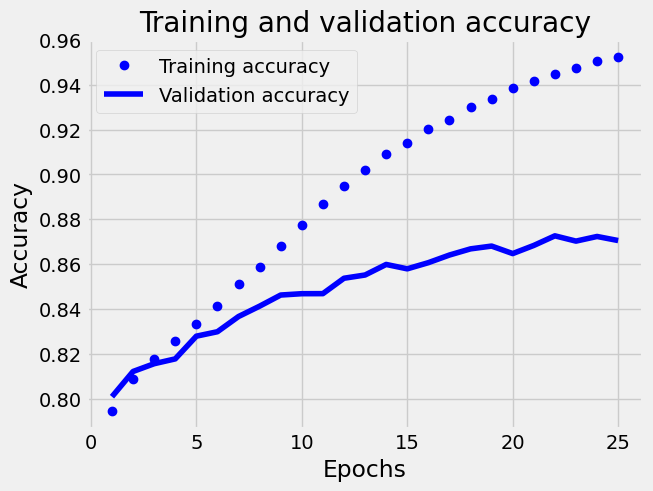

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
print(classification_report(y_test,y_pred_binary))


1379/1379 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87     21994
         1.0       0.85      0.90      0.88     22133

    accuracy                           0.87     44127
   macro avg       0.87      0.87      0.87     44127
weighted avg       0.87      0.87      0.87     44127



In [ ]:
model.save('fnn_RainPredict.h5')

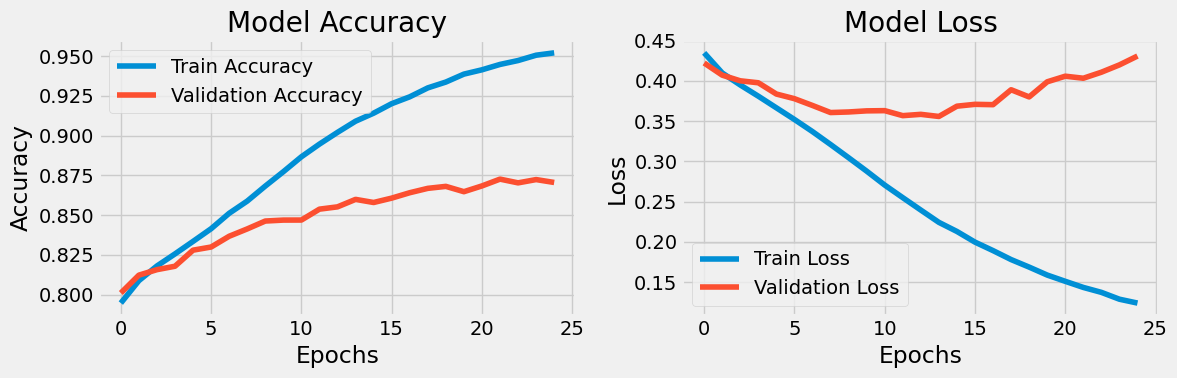

In [ ]:
import matplotlib.pyplot as plt

# Vẽ đồ thị độ chính xác
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Đưa 1 dòng dữ liệu vào mô hình để thực hiện dự đoán

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./fnn_RainPredict.h5')

In [ ]:
random_row_index = np.random.randint(x_test.shape[0])


arr_selected = x_test[random_row_index:random_row_index+1]
y_selected = y_test[random_row_index:random_row_index+1]


y_pred = model.predict(arr_selected)
y_pred_binary = np.where(y_pred > 0.5, 1, 0)
print('pre: ', y_pred)
print('reality', y_selected)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
pre:  [[0.7475743]]
reality 150788    1.0
Name: RainTomorrow, dtype: float64


# Dự Đoán Nhiệt Độ Cao Nhất Trong Ngày

In [58]:
raindf_times_series.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  WindGustDir_x  \
0           44.0          20.0          24.0  ...         -1.000   
1           44.0           4.0          22.0  ...         -0.924   
2           46.0          19.0          26.0  ...         -0.924   
3           24.0          11.0           9.0  ...          0.707   
4           41.0           7.0          20.0  ...         -1.000   

   WindGustDir_y  WindDir9am_x  WindDir9am_y  WindDir3pm_x  WindDir3pm_y  \
0         -0.000        -1.000        -0.000        -0.924         0.383   
1          0.383        -0.383         0.924        -0.924        -0.383   
2         -0.383        -1.000        -0.000        -0.924        -0.383   
3          0.707         0.707        -0.707         1.000         0.000   
4         -0.000         0.924         0.383        -0.707         0.707   

        Lat        Lon     month_sin  month_cos  
0 -36.07373  146.91354 -2.449294e-16        1.0  
1 -36.07373  146.91354 -2.449294e-16        1.0  
2 -36.07373  146.91354 -2.449294e-16        1.0  
3 -36.07373  146.91354 -2.449294e-16        1.0  
4 -36.07373  146.91354 -2.449294e-16        1.0  

[5 rows x 29 columns]

In [59]:
from sklearn.preprocessing import StandardScaler
import miceforest as mf

raindf_X = raindf_times_series.drop(['Date', 'Location'],axis=1)
columns = raindf_X.columns
scaler = StandardScaler()
raindf_X = scaler.fit_transform(raindf_X)
raindf_X = pd.DataFrame(raindf_X, columns=columns)
kds = mf.ImputationKernel(
  raindf_X,
  save_all_iterations=True,
  random_state=42
)


kds.mice(2)

raindf_X = kds.complete_data()

In [60]:
raindf_X['Date'] = raindf_times_series['Date']
raindf_X['Location']  = raindf_times_series['Location']

In [61]:
raindf_X.groupby(by='Location')['Rainfall'].count().sort_values(ascending=False)

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Melbourne           3193
Perth               3193
Hobart              3193
Brisbane            3193
Darwin              3193
Albany              3040
Launceston          3040
GoldCoast           3040
Townsville          3040
MountGambier        3040
Cairns              3040
Bendigo             3040
Ballarat            3040
Wollongong          3040
AliceSprings        3040
Albury              3040
MountGinini         3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Moree               3009
Sale                3009
BadgerysCreek       3009
Witchcliffe         3009
Williamtown         3009
Watsonia            3009
WaggaWagga          3009
Cobar               3009
CoffsHarbour        3009
SydneyAirport       3009
Dartmoor            3009
Mildura             3009
Woomera             3009
Richmond            3009
Portland            3009
PerthAirport        3009
MelbourneAirport

Canberra là khu vực có số lượng quan sát đầy đủ nhất

In [62]:
canberra_raindf = raindf_X[raindf_X['Location'] == 'Canberra']
canberra_raindf.drop('Location', axis=1)

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
45587 -0.655474  0.151517 -0.278475    -0.493178 -0.346372      -0.737504   
45588  0.282249  0.516735  0.146152    -0.254724  0.551802      -0.076081   
45589  0.235363  0.025095  0.146152     0.079112 -1.138879       3.304529   
45590  0.172848 -1.084608  4.416012     0.412947  0.393300       1.026292   
45591 -0.717989 -1.000326  0.051791     0.031421  0.789554       0.732326   
...         ...       ...       ...          ...       ...            ...   
49018 -2.280862 -1.196983 -0.254884    -0.922396 -0.082203      -1.839877   
49019 -1.968288 -1.309358 -0.278475    -1.208541 -1.482298      -0.223064   
49020 -2.359006 -1.393639 -0.231294    -0.683942 -1.878551      -0.370047   
49021 -1.890144 -1.239123 -0.278475    -0.970087  1.027306       0.585343   
49022 -2.577808 -1.225076 -0.278475    -0.993932  0.525385       1.026292   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
45587     -0.902200      0.151802    -0.046289    -1.083829  ...   
45588     -1.126533     -0.188729     0.584325    -0.747223  ...   
45589     -0.902200     -1.437343     0.689427     0.839634  ...   
45590      1.789788      0.605844    -0.361595     0.214509  ...   
45591      0.668126      1.059885    -0.046289    -0.122097  ...   
...             ...           ...          ...          ...  ...   
49018     -0.902200     -0.869791     1.582795    -0.074011  ...   
49019     -1.350865      0.378823     1.582795     0.214509  ...   
49020     -0.790034      0.378823     1.582795     0.118335  ...   
49021      0.668126      1.059885    -0.046289    -0.314444  ...   
49022     -0.565702      1.059885     0.636876    -0.122097  ...   

       WindGustDir_y  WindDir9am_x  WindDir9am_y  WindDir3pm_x  WindDir3pm_y  \
45587       1.077748     -1.041494     -1.001778     -0.967050      1.076208   
45588       0.615400      1.417509     -0.019266     -1.379062      0.068024   
45589       1.077748     -0.023032      1.370427      0.565691      1.385651   
45590       1.077748     -1.354091      0.512987     -1.379062      0.068024   
45591      -1.249687      0.528695     -1.303342      1.326436     -0.478135   
...              ...           ...           ...           ...           ...   
49018      -0.477681     -0.023032     -1.408958     -0.967050     -0.940160   
49019       1.077748     -0.574759      1.264810     -0.511447      1.385651   
49020       1.387406     -0.023032      1.370427     -0.511447      1.385651   
49021       1.077748     -0.023032      1.370427     -0.967050      1.076208   
49022       0.615400      0.995430     -1.001778     -1.272192      0.614183   

            Lat       Lon  month_sin  month_cos       Date  
45587 -0.581912  0.563766  -0.725379   1.245139 2007-11-01  
45588 -0.581912  0.563766  -0.725379   1.245139 2007-11-02  
45589 -0.581912  0.563766  -0.725379   1.245139 2007-11-03  
45590 -0.581912  0.563766  -0.725379   1.245139 2007-11-04  
45591 -0.581912  0.563766  -0.725379   1.245139 2007-11-05  
...         ...       ...        ...        ...        ...  
49018 -0.581912  0.563766  -0.016425  -1.388032 2017-06-21  
49019 -0.581912  0.563766  -0.016425  -1.388032 2017-06-22  
49020 -0.581912  0.563766  -0.016425  -1.388032 2017-06-23  
49021 -0.581912  0.563766  -0.016425  -1.388032 2017-06-24  
49022 -0.581912  0.563766  -0.016425  -1.388032 2017-06-25  

[3436 rows x 28 columns]

In [63]:
canberra_raindf.set_index('Date', inplace=True)
canberra_raindf = canberra_raindf.asfreq('D')
canberra_raindf['MaxTemp'] = canberra_raindf['MaxTemp'].interpolate(method='linear')


# Phân tích thành phần mùa vụ, xu hướng và ngẫu nhiên

<Axes: xlabel='Date'>

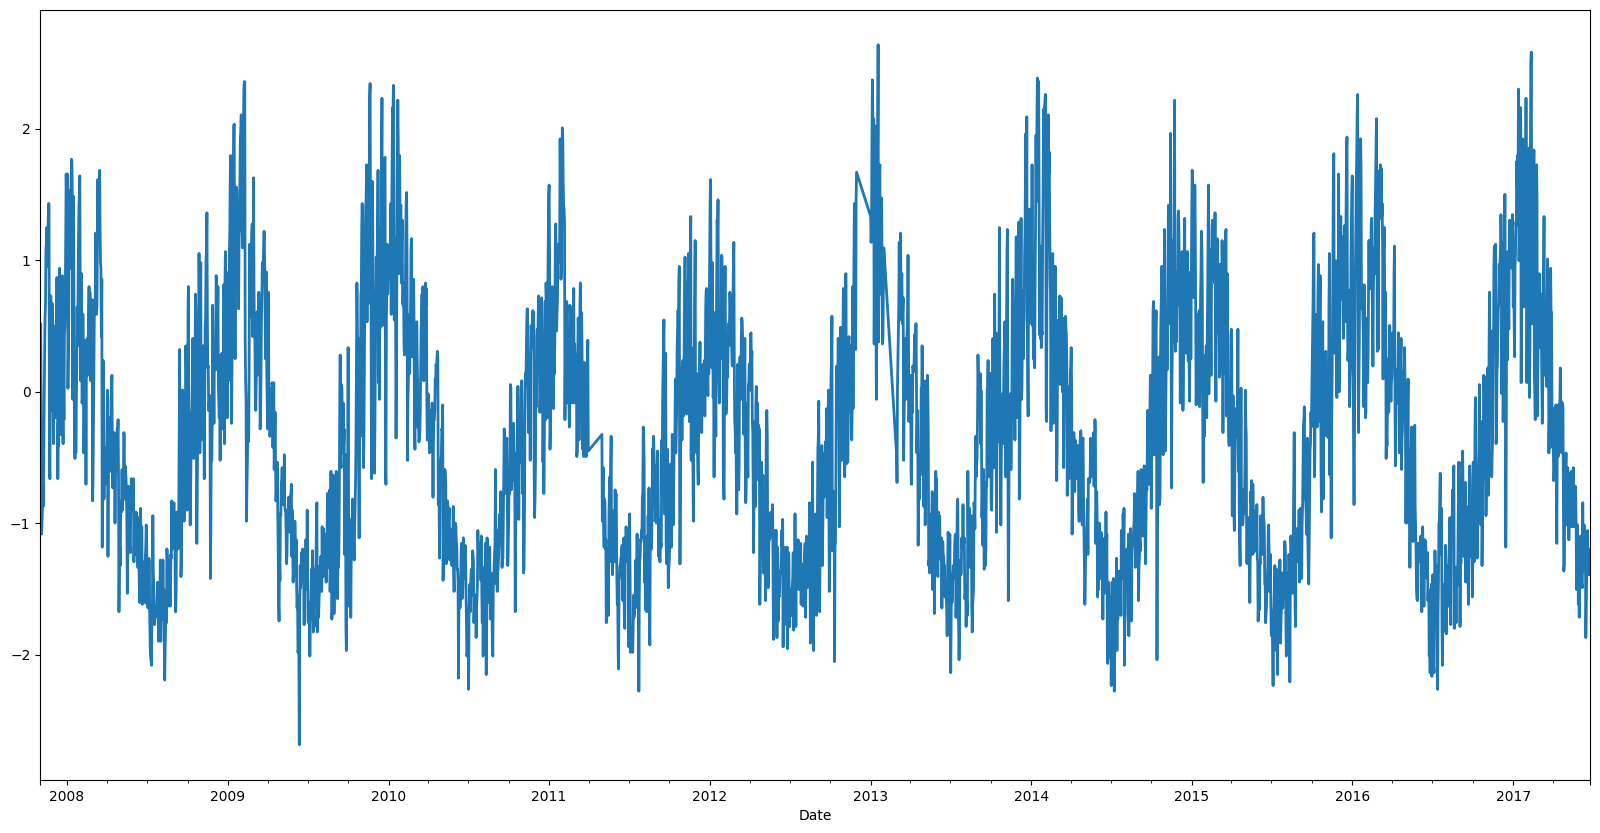

In [64]:
canberra_raindf['MaxTemp'].plot(figsize=(20, 10), linewidth=2)

<Axes: xlabel='Date'>

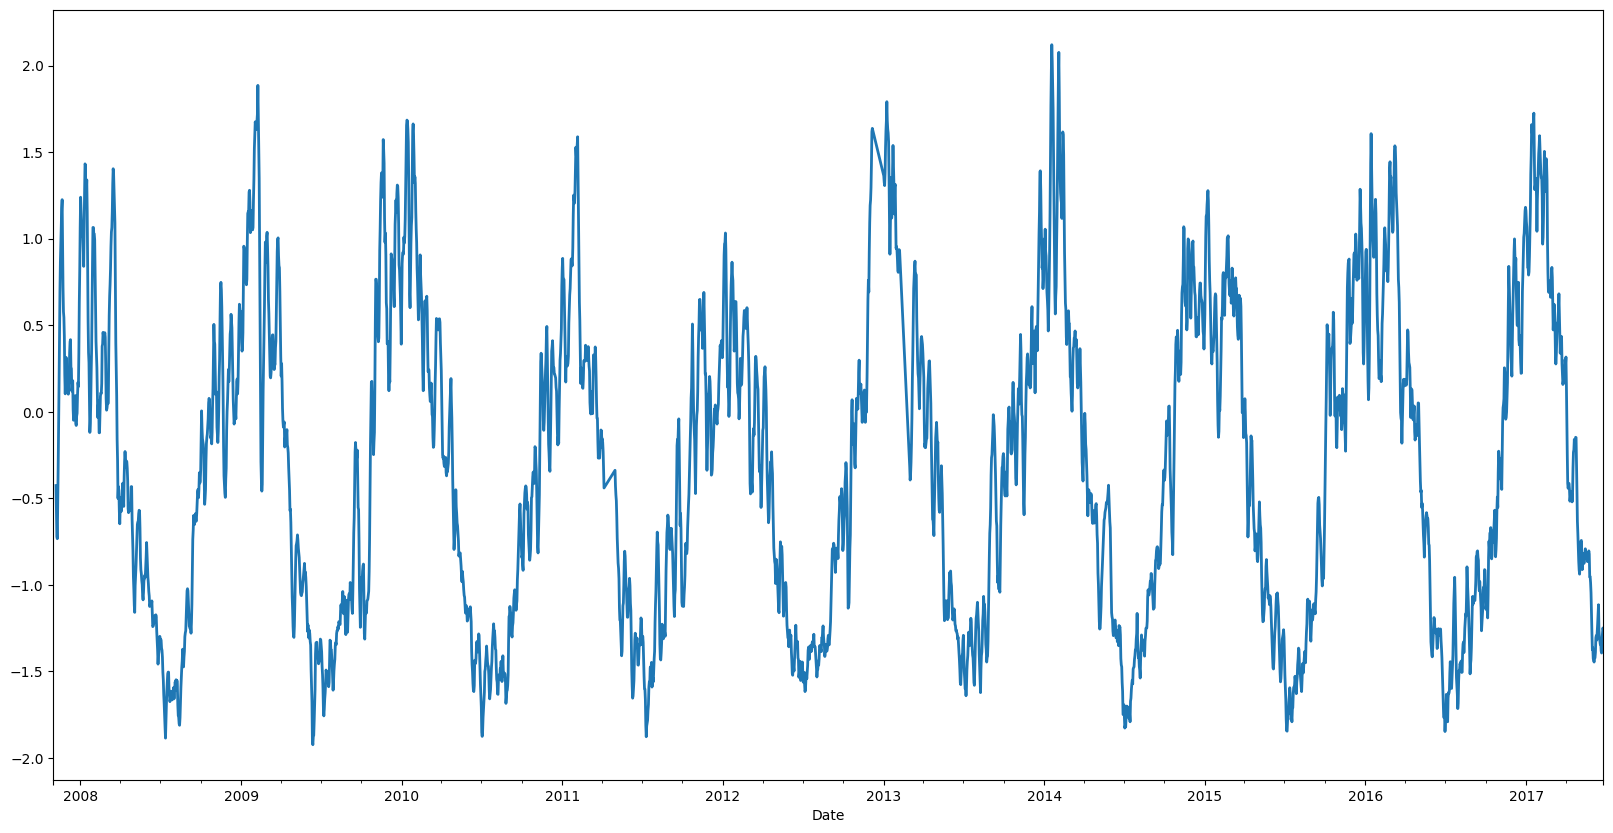

In [65]:
canberra_raindf['MaxTemp'].rolling(window=7).mean().plot(figsize=(20, 10), linewidth=2)

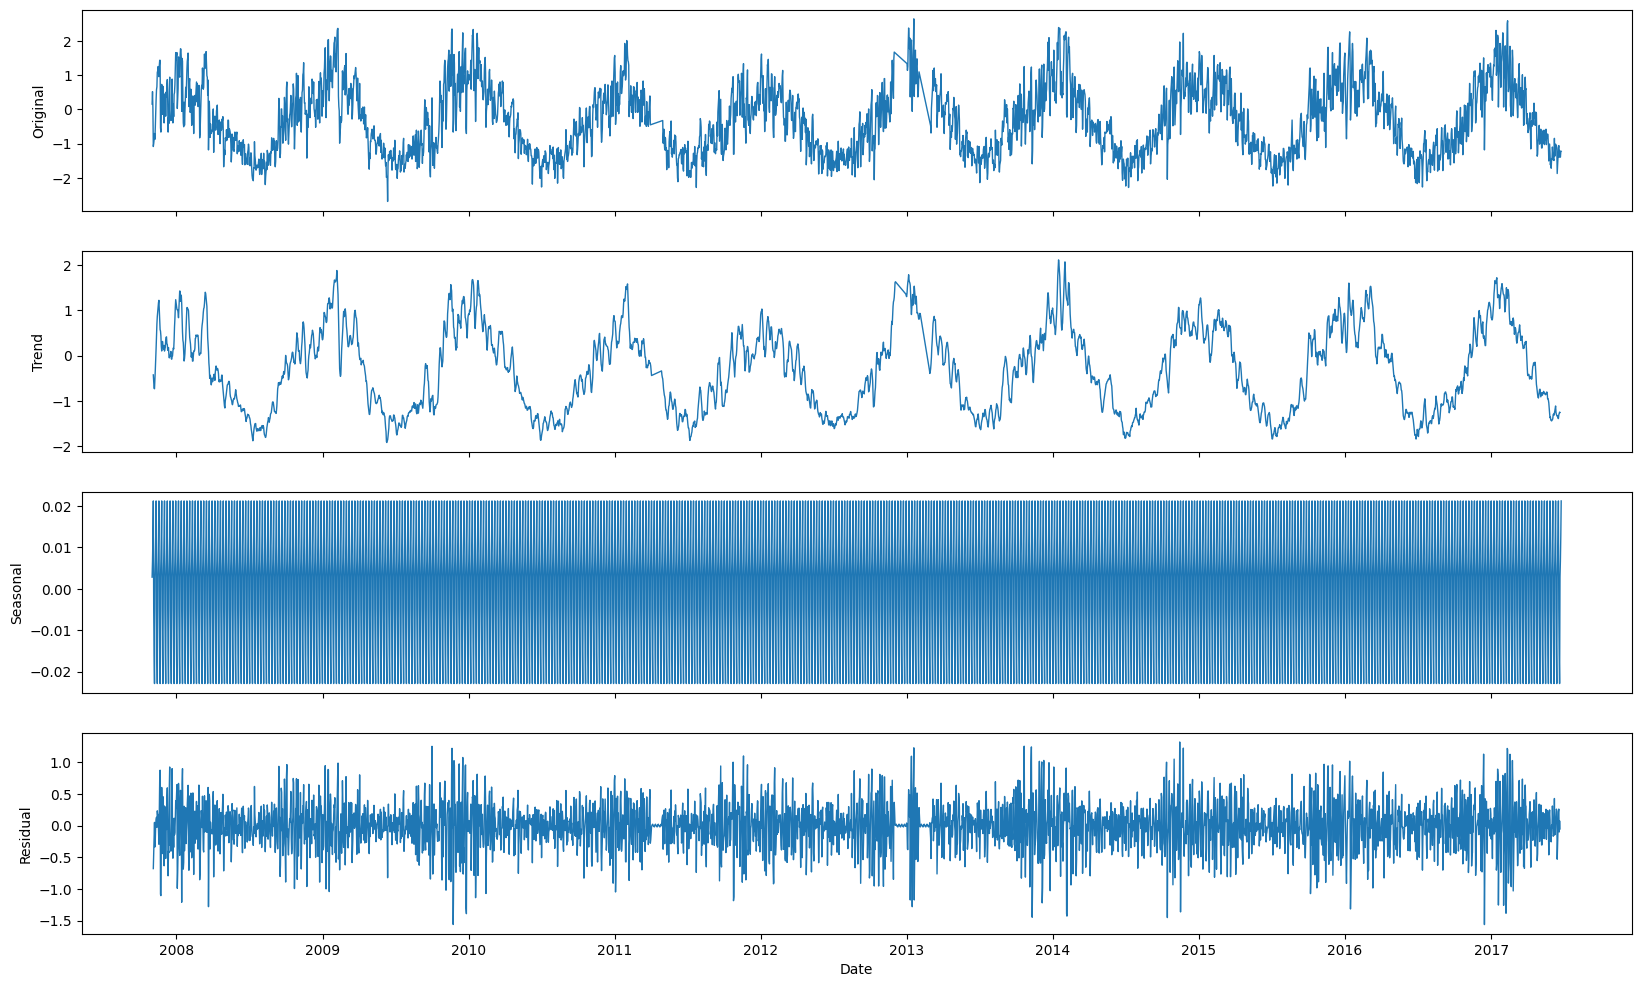

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

canberra_data_decomposition = seasonal_decompose(canberra_raindf['MaxTemp'], model='additive')

trend = canberra_data_decomposition.trend
seasonal = canberra_data_decomposition.seasonal
residual = canberra_data_decomposition.resid


fig, axes = plt.subplots(4, 1, figsize=(20, 12), sharex=True)
axes[0].plot(canberra_raindf['MaxTemp'], label='Original', linewidth=1)  
axes[0].set_ylabel('Original')

axes[1].plot(trend, label='Trend', linewidth=1)  
axes[1].set_ylabel('Trend')

axes[2].plot(seasonal, label='Seasonal', linewidth=1)  
axes[2].set_ylabel('Seasonal')

axes[3].plot(residual, label='Residual', linewidth=1)  
axes[3].set_ylabel('Residual')

plt.xlabel('Date')
plt.show()

Ta cần phân tích kĩ hơn để thấy được tính mùa vụ và chu kì của chuỗi 

<Axes: xlabel='Date'>

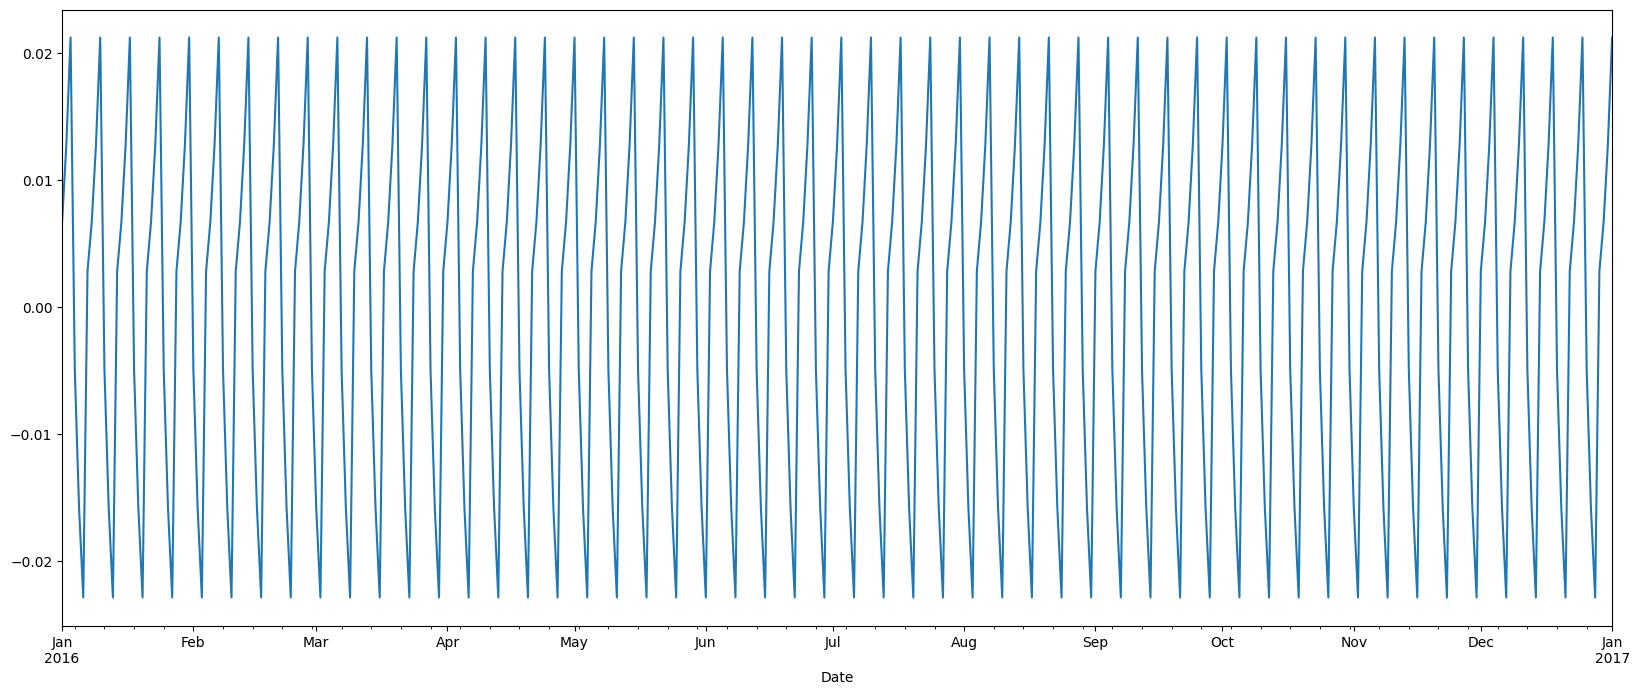

In [67]:
canberra_data_decomposition.seasonal.loc['2016-01-01':'2017-01-01'].plot(figsize=(20, 8), )

<Axes: xlabel='Date'>

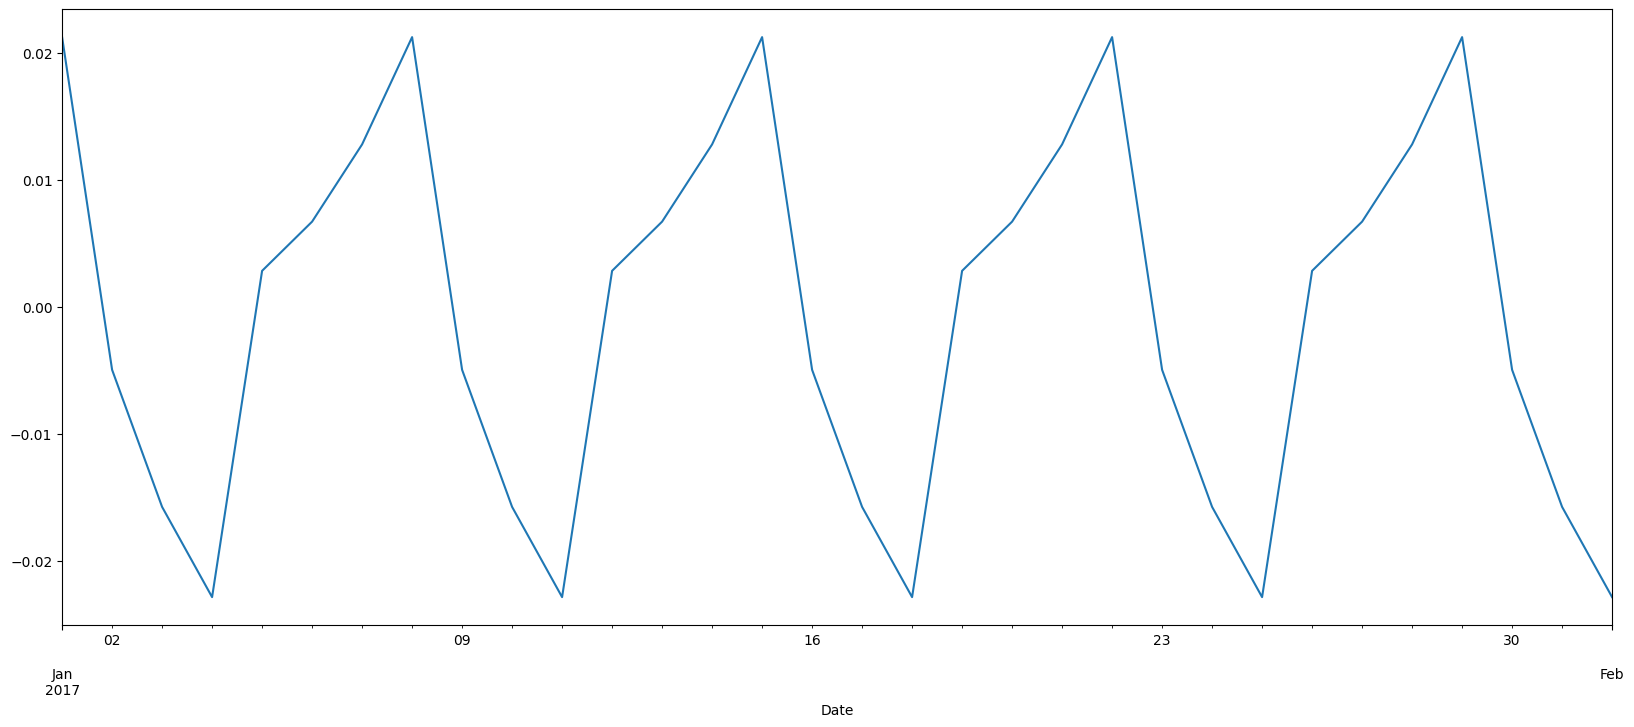

In [68]:
canberra_data_decomposition.seasonal.loc['2017-01-01':'2017-02-01'].plot(figsize=(20, 8))

# kiểm tra tính dừng của chuỗi thời gian

In [69]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, windows):

    MA = timeseries.rolling(window=windows).mean()
    MSTD = timeseries.rolling(window=windows).std()

    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original', linewidth=2)
    mean = plt.plot(MA, color='red', label='MA', linewidth=2)
    std = plt.plot(MSTD, color='black', label = 'MSTD', linewidth=2)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

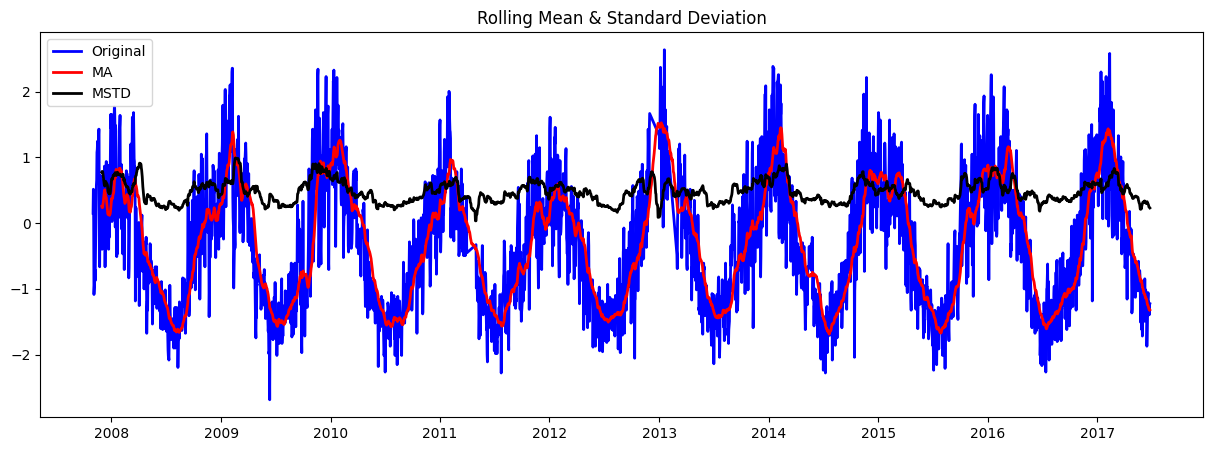

Results of Dickey-Fuller Test:
Test Statistic                   -3.595996
p-value                           0.005838
#Lags Used                       17.000000
Number of Observations Used    3507.000000
Critical Value (1%)              -3.432216
Critical Value (5%)              -2.862364
Critical Value (10%)             -2.567209
dtype: float64


In [70]:
test_stationarity(canberra_raindf['MaxTemp'], windows= 30)


Test Statistic =  -3.595996 là 1 giá trị rất nhỏ, và p-value = 0.005840 (rất gần 0) cho thấy rằng có đủ bằng chứng để bác bỏ giả thuyết không có tính dừng.\
 Giá trị thống kê  -3.595996 vượt quá tất cả các giá trị Critical Value tại mức ý nghĩa 1%, 5% và 10%. Điều này cũng là một bằng chứng mạnh mẽ rằng chuỗi dữ liệu có tính dừng.

### Lựa chọn tham số cho mô hình

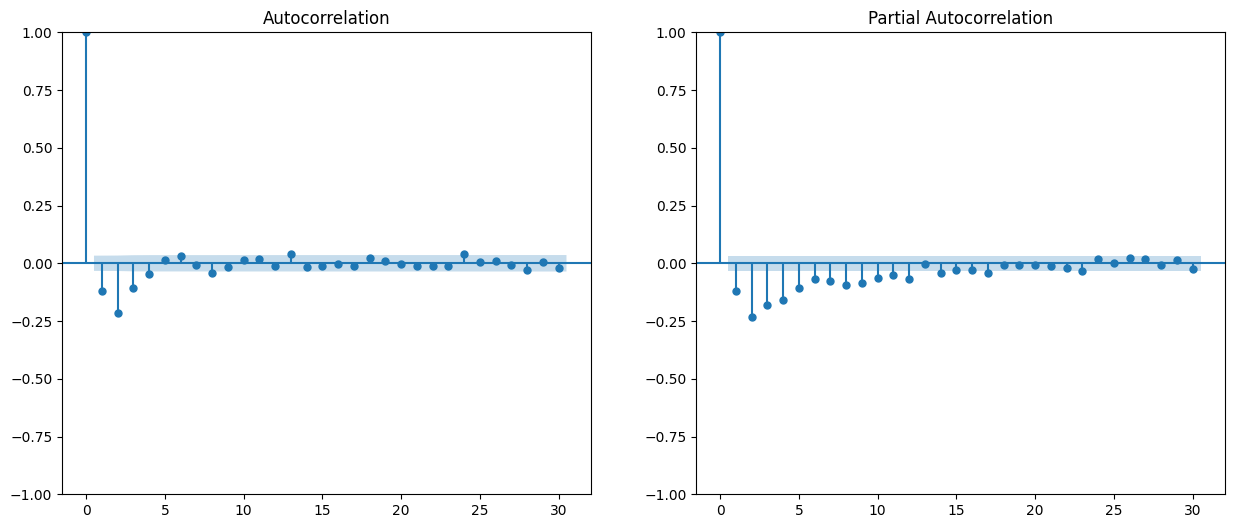

In [71]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_diff = canberra_raindf['MaxTemp'].diff().dropna()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(data_diff, lags=30, ax=ax[0])
plot_pacf(data_diff, lags=30, ax=ax[1])
plt.show()

Từ biểu đồ PACF chúng ta có thể thử (p = 10), (p = 11), (p = 12) hoặc (p = 13).\
Từ biểu đồ ACF ta thấy giá trị tại lag 1,2,3 là đáng kể. Sau đó, các giá trị đều nằm trong phạm vi đáng tin cậy. Do đó, chúng ta có thể thử (q = 4).\
d = 0 vì chuỗi đã là chuỗi dừng

# ARIMA

In [121]:
from statsmodels.tsa.arima.model import ARIMA

# Build the model
model = ARIMA(canberra_raindf['MaxTemp'], order=(12,0,4))
model_fit = model.fit()


print(model_fit.summary())

c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                MaxTemp   No. Observations:                 3525
Model:                ARIMA(12, 0, 4)   Log Likelihood               -1942.730
Date:                Thu, 30 May 2024   AIC                           3921.459
Time:                        20:16:44   BIC                           4032.477
Sample:                    11-01-2007   HQIC                          3961.066
                         - 06-25-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3122      0.282     -1.106      0.269      -0.865       0.241
ar.L1         -0.0654      0.604     -0.108      0.914      -1.250       1.119
ar.L2          0.6820      0.191      3.579      0.0

Đánh giá mô hình


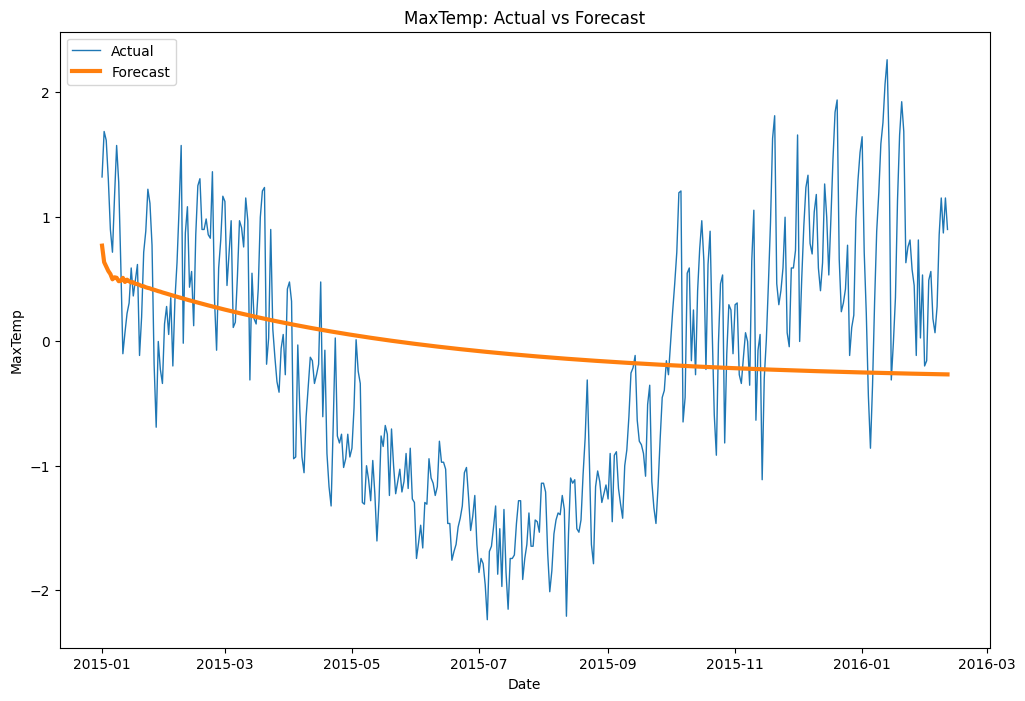

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

start_index = '2015-01-01'
end_index = '2016-02-11'


canberra_raindf['forecast'] = model_fit.predict(start=start_index, end=end_index, dynamic=True)

# Vẽ biểu đồ cho dữ liệu thực tế và dữ liệu dự báo
plt.figure(figsize=(12, 8))
plt.plot(canberra_raindf.loc[start_index:end_index, 'MaxTemp'], label='Actual', linewidth=1)
plt.plot(canberra_raindf.loc[start_index:end_index, 'forecast'], label='Forecast', linestyle='-', linewidth=3)
plt.title('MaxTemp: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend(loc='best')
plt.show()


In [123]:
from sklearn.metrics import mean_squared_error
# Dự đoán

canberra_raindf['forecast'] = model_fit.predict(start=start_index, end=end_index, dynamic=True)

# Tính toán MSE
actual = canberra_raindf.loc[start_index:end_index, 'MaxTemp']
forecast = canberra_raindf.loc[start_index:end_index, 'forecast']
mse = mean_squared_error(actual, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0232127428333948


## SARIMA


In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(canberra_raindf['MaxTemp'], order=(12, 0, 4), seasonal_order=(2, 1, 2, 30))
model_fit = model.fit()
print(model_fit.summary())


c:\Users\ledin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                        SARIMAX Results                                         
Dep. Variable:                                  MaxTemp   No. Observations:                 3525
Model:             SARIMAX(12, 0, 4)x(2, 1, [1, 2], 30)   Log Likelihood               -1998.165
Date:                                  Thu, 30 May 2024   AIC                           4038.330
Time:                                          21:05:37   BIC                           4167.671
Sample:                                      11-01-2007   HQIC                          4084.493
                                           - 06-25-2017                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1800      0.504     -0.357      0.721      -1.168

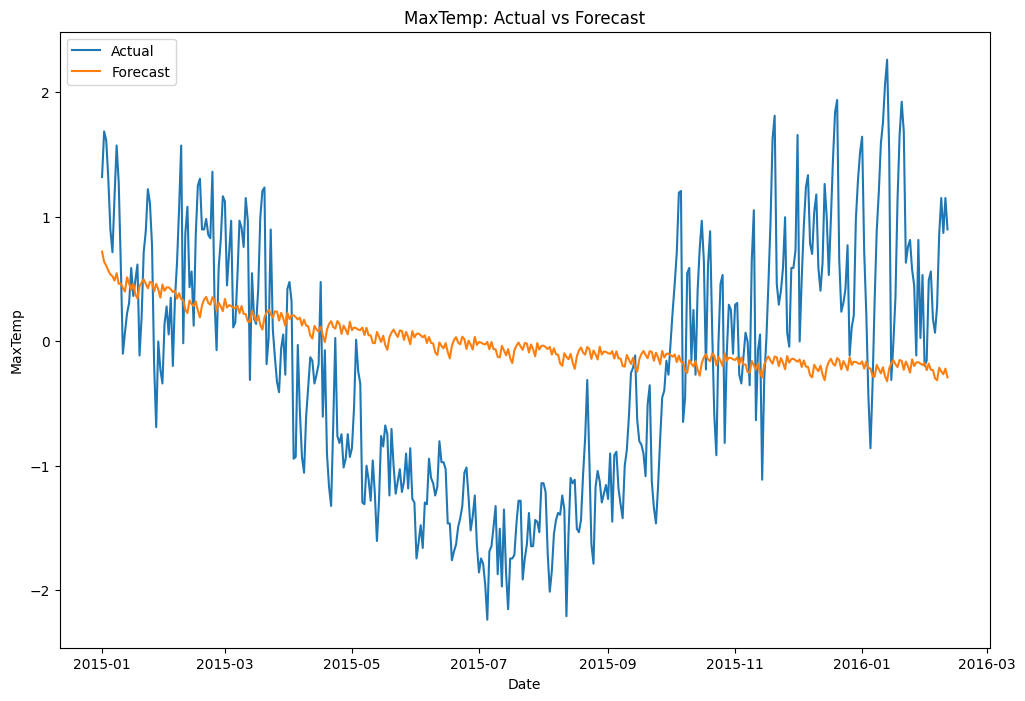

In [134]:
canberra_raindf['forecast'] = model_fit.predict(start=start_index, end=end_index, dynamic=True)

plt.figure(figsize=(12, 8))
plt.plot(canberra_raindf.loc[start_index:end_index, 'MaxTemp'], label='Actual')
plt.plot(canberra_raindf.loc[start_index:end_index, 'forecast'], label='Forecast', linestyle='-')
plt.title('MaxTemp: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('MaxTemp')
plt.legend(loc='best')
plt.show()


In [135]:
canberra_raindf['forecast'] = model_fit.predict(start=start_index, end=end_index, dynamic=True)

actual = canberra_raindf.loc[start_index:end_index, 'MaxTemp']
forecast = canberra_raindf.loc[start_index:end_index, 'forecast']
mse = mean_squared_error(actual, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0427765381438237
